### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### Importing Data set

In [2]:
data1=pd.read_csv('/Users/leo/Downloads/archive/Train.csv')

Here, we are deleting the var_1 column, because these two unnecessary.

In [3]:
df=pd.read_csv('/Users/leo/Downloads/archive/Train.csv')
df=df.drop(['Var_1'],axis=1)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


### Shape of the dataset

In [4]:
df.shape

(8068, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [6]:
df.describe()


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# DATA CLEANING AND DATA ANALYSIS

### Here, we are finding categorical and numerical columns in the data set

In [7]:
new_dfs=df.copy()

In [8]:
new_dfs.rename(columns={'Age': 'Age in years', 'Work_Experience': 'Work_Experience in Years'}, inplace=True)

In [9]:
new_dfs

,ID,Gender,Ever_Married,Age in years,Graduated,Profession,Work_Experience in Years,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [10]:
categorical_columns = [x for x in df.columns if df[x].dtypes == 'object']
continuous_columns = [x for x in df.columns if df[x].dtypes != 'object']

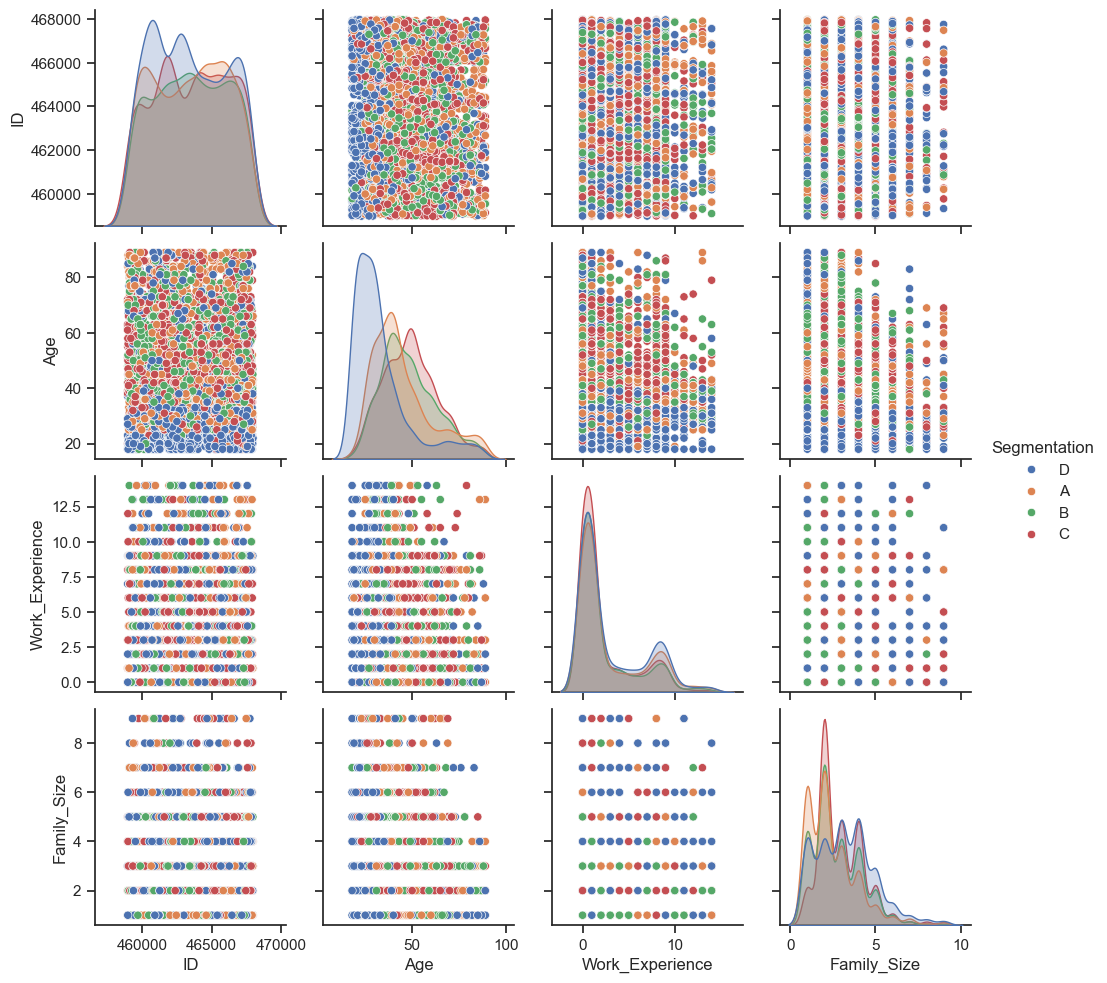

In [11]:
sns.set(style="ticks")
sns.pairplot(df[continuous_columns + ['Segmentation']], hue='Segmentation', diag_kind='kde')
plt.show()

### Here, we display some relationship between  the variables and pie chart of each variable

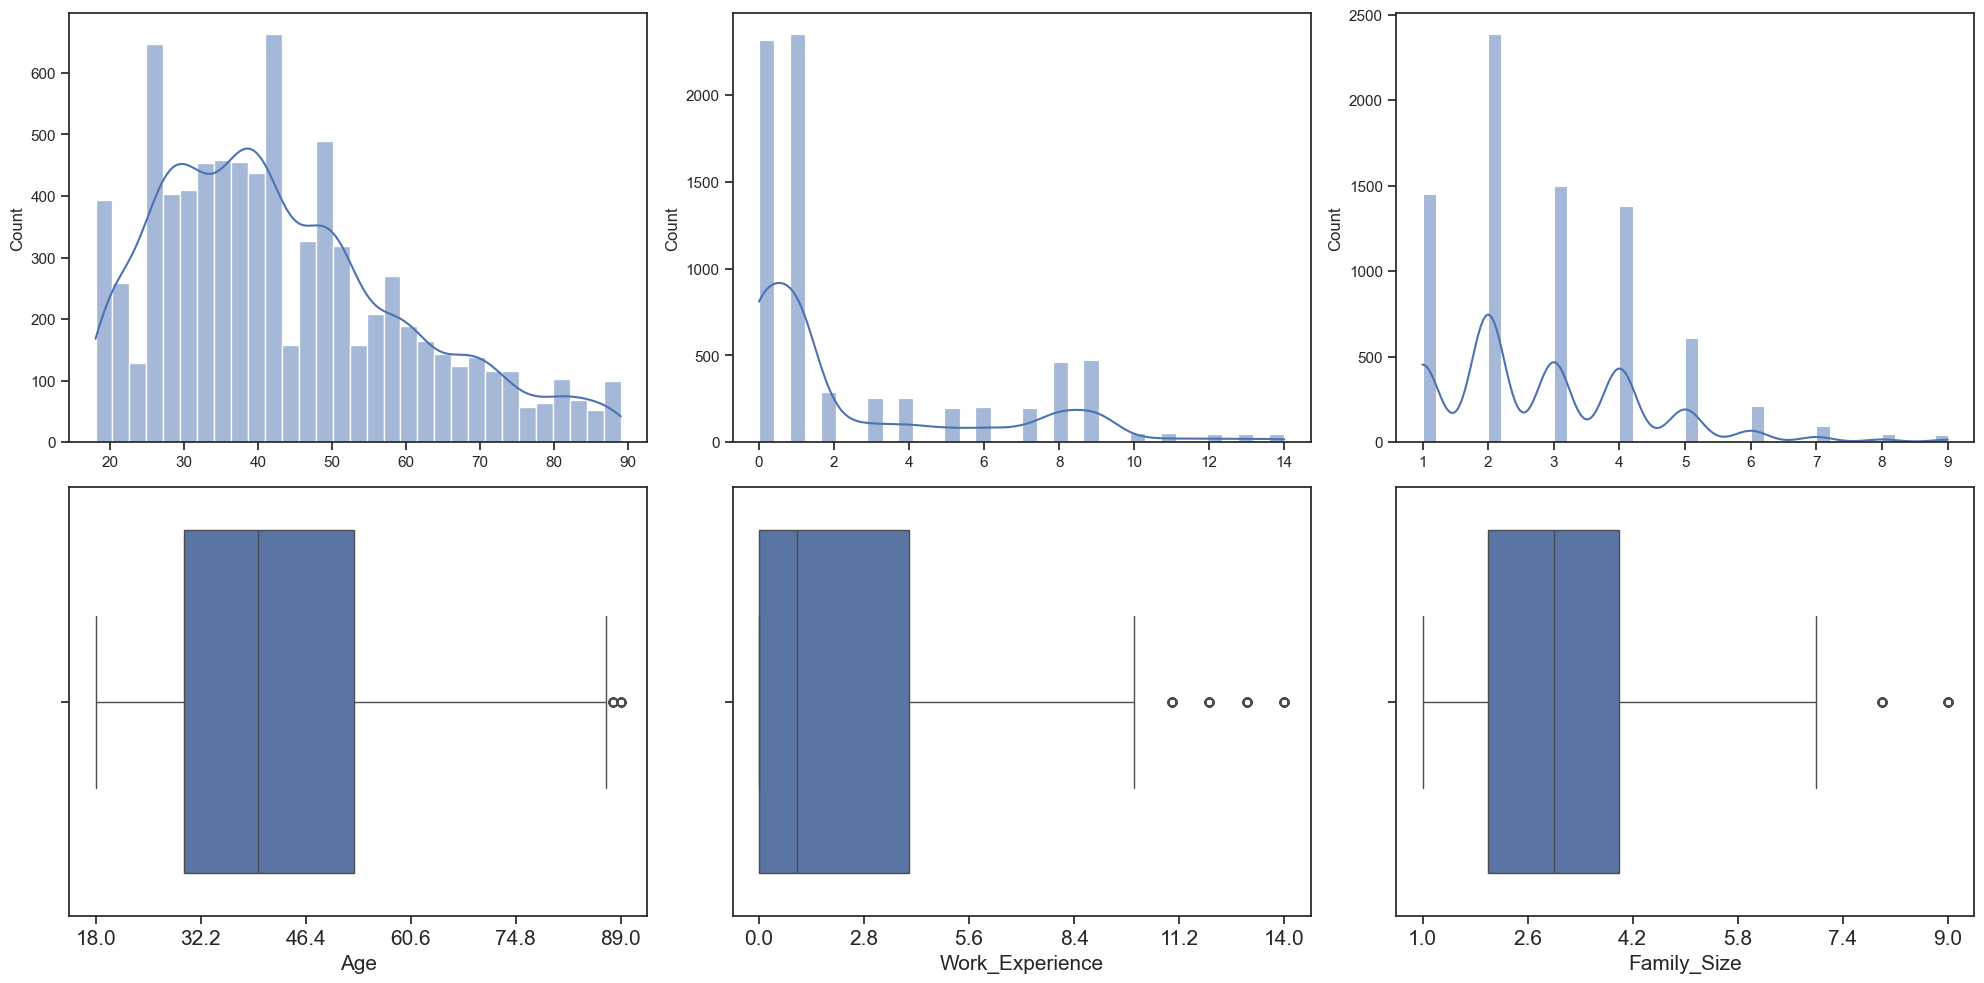

In [12]:
specific_col = ["Age", "Work_Experience", "Family_Size"]

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

for i, plot in enumerate(specific_col):
    
    sns.histplot(data=df, x=plot, ax=ax[i], kde=True)
    ax[i].set_xlabel("")

    sns.boxplot(data=df, x=plot, ax=ax[i + 3])
    ax[i + 3].set_xticks(np.around(np.linspace(df[plot].min(), df[plot].max(), 6), 2))
    ax[i + 3].set_xticklabels(np.around(np.linspace(df[plot].min(), df[plot].max(), 6), 2), fontsize=15)
    ax[i + 3].set_xlabel(plot, fontsize=15)

plt.tight_layout()
plt.show()

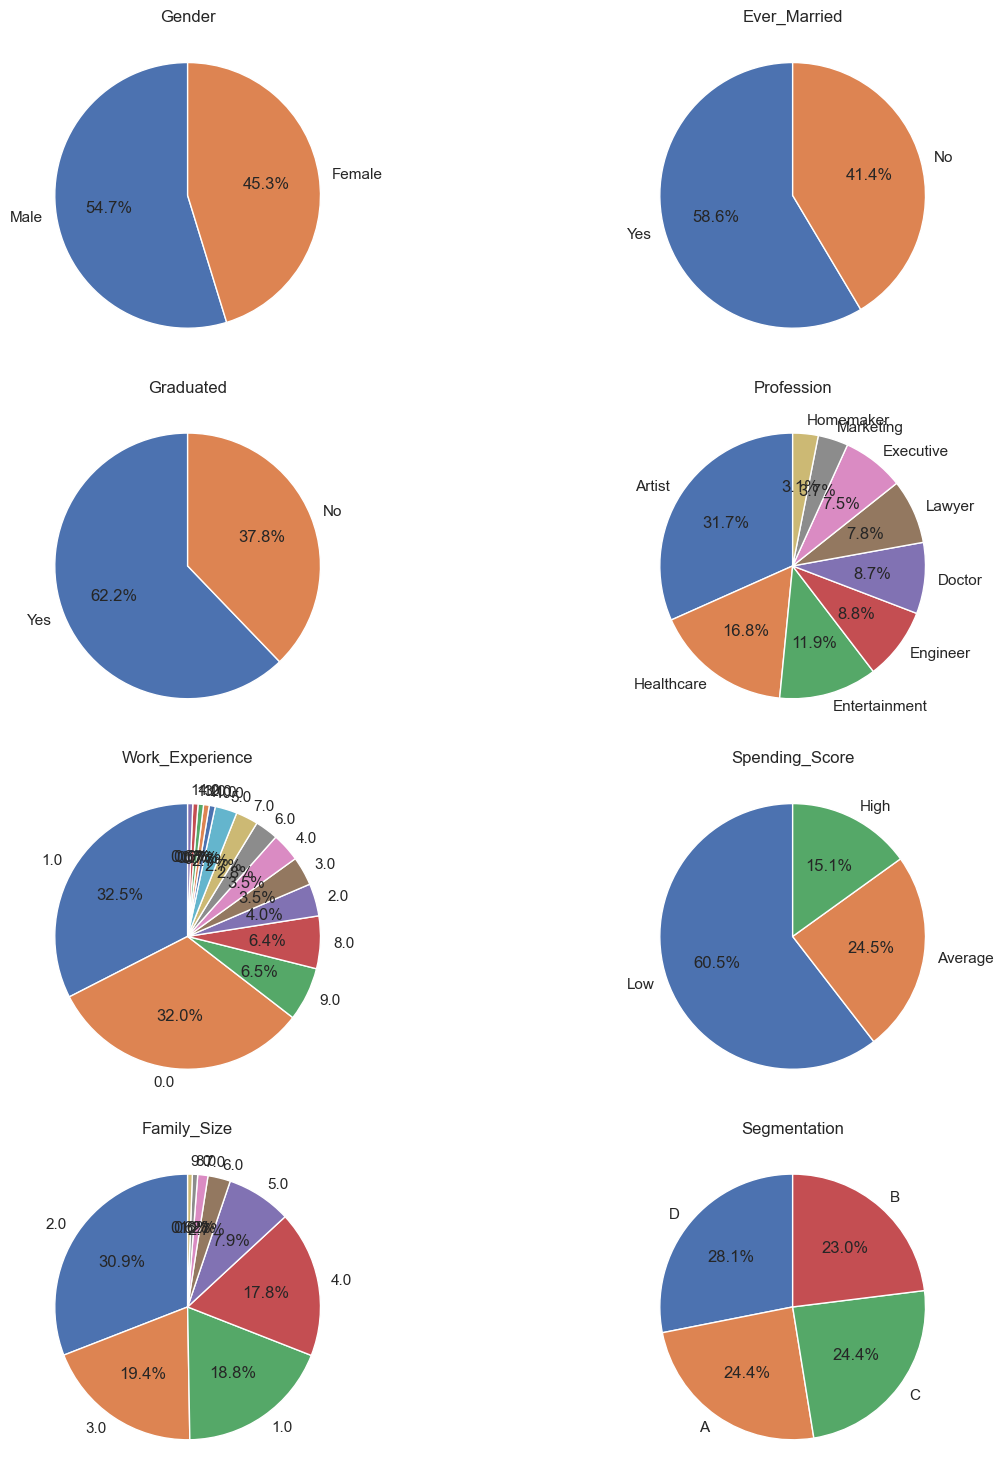

In [13]:
columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size',  'Segmentation']

# Set up the matplotlib figure with subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns):
    # Calculate the count of each category in the column
    counts = df[column].value_counts()
    
    # Plot pie chart
    axes.flatten()[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes.flatten()[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

To categorize better into groups, we added an another coloumn "categorized_ages"

In [14]:
def create_age_category_column(dataframe):
    bins = [0, 18, 25, 35, 46, 100]
    labels = ['0-18', '19-25', '26-35', '36-46', '47+']
    dataframe['categorized_ages'] = pd.cut(dataframe['Age'], bins=bins, labels=labels)
    return dataframe
df = create_age_category_column(df)
df.head(5)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,categorized_ages
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,19-25
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,36-46
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,47+
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,47+
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,36-46


### Checking Null values in column

In [15]:
def count_null_values(dataframe, field):
    return dataframe[field].isnull().sum()

print("Missing Values in each column:")
for column in df.columns:
    print(f"{column} : {count_null_values(df, column)}")


Missing Values in each column:
ID : 0
Gender : 0
Ever_Married : 140
Age : 0
Graduated : 78
Profession : 124
Work_Experience : 829
Spending_Score : 0
Family_Size : 335
Segmentation : 0
categorized_ages : 0


In [16]:
df.isna().sum().sum()

1506

## From here onwards, we are going to replace null values with related one, by comparing and analysing the other rows.

In [17]:
def groupby_count(df, groupby_cols, count_col, filter_cols=None):
    selected_cols = filter_cols + groupby_cols + [count_col] if filter_cols else groupby_cols + [count_col]
    grouped_df = df[selected_cols].groupby(by=groupby_cols).count()
    return grouped_df


In [18]:
import tabulate

result_table = groupby_count(df, ['Spending_Score', 'Ever_Married'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))



+----------------+--------------+------+
| Spending_Score | Ever_Married |  ID  |
+----------------+--------------+------+
|    Average     |     Yes      | 1937 |
|      High      |     Yes      | 1176 |
|      Low       |      No      | 3285 |
|      Low       |     Yes      | 1530 |
+----------------+--------------+------+


In [19]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [20]:
import tabulate

result_table = groupby_count(df, ['Profession', 'Ever_Married'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+---------------+--------------+------+
|  Profession   | Ever_Married |  ID  |
+---------------+--------------+------+
|    Artist     |      No      | 713  |
|    Artist     |     Yes      | 1774 |
|    Doctor     |      No      | 366  |
|    Doctor     |     Yes      | 311  |
|   Engineer    |      No      | 267  |
|   Engineer    |     Yes      | 415  |
| Entertainment |      No      | 358  |
| Entertainment |     Yes      | 579  |
|   Executive   |      No      |  37  |
|   Executive   |     Yes      | 550  |
|  Healthcare   |      No      | 1153 |
|  Healthcare   |     Yes      | 145  |
|   Homemaker   |      No      | 112  |
|   Homemaker   |     Yes      | 128  |
|    Lawyer     |      No      |  40  |
|    Lawyer     |     Yes      | 575  |
|   Marketing   |      No      | 189  |
|   Marketing   |     Yes      |  96  |
+---------------+--------------+------+


We are comparing the other rows and replace with accurate value which is suitable to the null value.

In [21]:
import tabulate
result_table = groupby_count(df, ['categorized_ages', 'Ever_Married'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+--------------+------+
| categorized_ages | Ever_Married |  ID  |
+------------------+--------------+------+
|       0-18       |      No      | 125  |
|       0-18       |     Yes      |  4   |
|      19-25       |      No      | 771  |
|      19-25       |     Yes      |  69  |
|      26-35       |      No      | 1360 |
|      26-35       |     Yes      | 553  |
|      36-46       |      No      | 723  |
|      36-46       |     Yes      | 1338 |
|       47+        |      No      | 306  |
|       47+        |     Yes      | 2679 |
+------------------+--------------+------+


From above cells, we conclude that
whenever "spending_score" is "high" the "ever_married" column would be "yes"

In [22]:
def update_ever_married(df, condition, value):
    x = df.query(condition + " and Ever_Married.isna()")
    x['Ever_Married'] = value
    df.update(x)

update_ever_married(df, "Spending_Score == 'High'", 'Yes')
update_ever_married(df, "Profession == 'Healthcare'", 'No')
update_ever_married(df, "categorized_ages == '47+'", 'Yes')
update_ever_married(df, "categorized_ages == '19-25'", 'No')
update_ever_married(df, "categorized_ages == '26-35'", 'No')


In [23]:
print(count_null_values(df,"Ever_Married"))


19


In [24]:
df.query("Ever_Married.isna()")['categorized_ages'].unique()


['36-46']
Categories (5, object): ['0-18' < '19-25' < '26-35' < '36-46' < '47+']

In [25]:
result_table = groupby_count(df.query("categorized_ages == '36-46'"), ['categorized_ages', 'Profession', 'Ever_Married'], 'ID').reset_index()

print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+---------------+--------------+-----+
| categorized_ages |  Profession   | Ever_Married | ID  |
+------------------+---------------+--------------+-----+
|       0-18       |    Artist     |      No      |  0  |
|       0-18       |    Artist     |     Yes      |  0  |
|       0-18       |    Doctor     |      No      |  0  |
|       0-18       |    Doctor     |     Yes      |  0  |
|       0-18       |   Engineer    |      No      |  0  |
|       0-18       |   Engineer    |     Yes      |  0  |
|       0-18       | Entertainment |      No      |  0  |
|       0-18       | Entertainment |     Yes      |  0  |
|       0-18       |   Executive   |      No      |  0  |
|       0-18       |   Executive   |     Yes      |  0  |
|       0-18       |  Healthcare   |      No      |  0  |
|       0-18       |  Healthcare   |     Yes      |  0  |
|       0-18       |   Homemaker   |      No      |  0  |
|       0-18       |   Homemaker   |     Yes      |  0  |
|       0-18  

In [26]:
print(count_null_values(df,'Ever_Married'))

19


In [27]:
def update_ever_married_condition(df, age_cat_condition, profession_condition):
    x = df.query(f"{age_cat_condition} and Ever_Married.isna() and {profession_condition}")
    y = df.query(f"{age_cat_condition} and Ever_Married.isna() and not {profession_condition}")

    x['Ever_Married'] = 'Yes'
    y['Ever_Married'] = 'No'

    df.update(x)
    df.update(y)

update_ever_married_condition(df, "categorized_ages=='36-46'", "Profession != 'Marketing'")

print(count_null_values(df,'Ever_Married'))


0


Till now, we can conclude :

All Average / High Spending_Score are Married 

People in Healthcare profession are mostly not married


47+ People are mostly married


19-25 People are mostly not married


26-35 People are mostly not married



Now, Let's look at graduated vs categorized_ages to make our clustering easier

In [28]:
count_null_values(df,'Graduated')


78

In [29]:
result_table = groupby_count(df, ['categorized_ages', 'Graduated'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+-----------+------+
| categorized_ages | Graduated |  ID  |
+------------------+-----------+------+
|       0-18       |    No     | 129  |
|       0-18       |    Yes    |  1   |
|      19-25       |    No     | 744  |
|      19-25       |    Yes    | 110  |
|      26-35       |    No     | 844  |
|      26-35       |    Yes    | 1086 |
|      36-46       |    No     | 485  |
|      36-46       |    Yes    | 1582 |
|       47+        |    No     | 820  |
|       47+        |    Yes    | 2189 |
+------------------+-----------+------+


In [30]:
result_table = groupby_count(df, ['Profession', 'Graduated'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+---------------+-----------+------+
|  Profession   | Graduated |  ID  |
+---------------+-----------+------+
|    Artist     |    No     | 293  |
|    Artist     |    Yes    | 2209 |
|    Doctor     |    No     | 288  |
|    Doctor     |    Yes    | 395  |
|   Engineer    |    No     | 385  |
|   Engineer    |    Yes    | 310  |
| Entertainment |    No     | 345  |
| Entertainment |    Yes    | 592  |
|   Executive   |    No     | 294  |
|   Executive   |    Yes    | 300  |
|  Healthcare   |    No     | 844  |
|  Healthcare   |    Yes    | 476  |
|   Homemaker   |    No     | 106  |
|   Homemaker   |    Yes    | 138  |
|    Lawyer     |    No     | 230  |
|    Lawyer     |    Yes    | 381  |
|   Marketing   |    No     | 173  |
|   Marketing   |    Yes    | 114  |
+---------------+-----------+------+


In [31]:
print(groupby_count(df, ['Ever_Married','Graduated'], 'ID') )


                          ID
Ever_Married Graduated      
No           No         1622
             Yes        1677
Yes          No         1400
             Yes        3291


In [32]:
def update_graduated_condition(df, condition, value):
    x = df.query(f"{condition} and Graduated.isna()")
    x['Graduated'] = value
    df.update(x)

update_graduated_condition(df, "(categorized_ages=='0-18' or categorized_ages=='19-25')", 'No')
update_graduated_condition(df, "Profession=='Artist'", 'Yes')
update_graduated_condition(df, "(categorized_ages=='47+')", 'Yes')
update_graduated_condition(df, "Ever_Married=='Yes'", 'Yes')


In [33]:
count_null_values(df,'Graduated')


14

In [34]:
df=df.drop(df.query("Graduated.isna()").index)


From Graduated, we have learnt 

0-18 People Are mostly not graduated

19-25 People are mostly not graduated

47+ People are mostly graduated

Most Artist are graduated

There is more chance that married people are Graduated


In [35]:
count_null_values(df,"Profession")


122

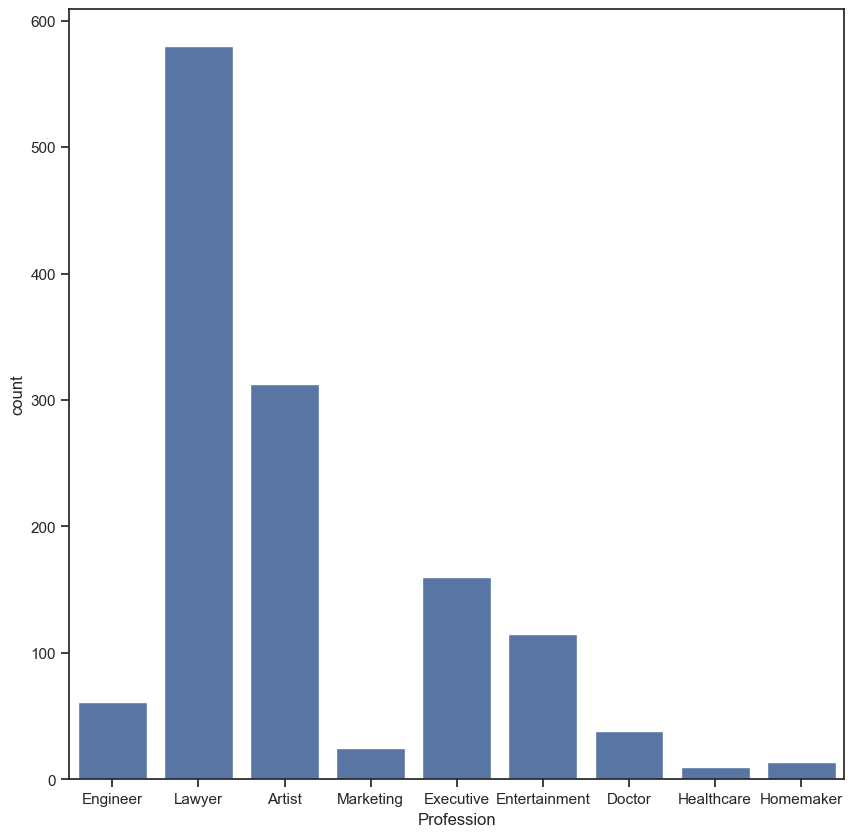

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_by_profession(df, condition, figsize=(10, 10)):
    filtered_df = df.query(condition)
    plt.figure(figsize=figsize)
    sns.countplot(data=filtered_df, x="Profession")

plot_count_by_profession(df, "Age > 60")
plt.show()


In [37]:
x=df.query("Age>60")
groupby_count(x, ['Spending_Score','Profession'], 'ID') 


ID
Spending_Score Profession        
Average        Artist         127
               Doctor          17
               Engineer        20
               Entertainment   50
               Executive        7
               Healthcare       3
               Homemaker        3
               Lawyer          16
               Marketing        3
High           Artist          77
               Doctor           6
               Engineer        13
               Entertainment   16
               Executive      120
               Homemaker        3
               Lawyer         304
               Marketing        7
Low            Artist         109
               Doctor          15
               Engineer        28
               Entertainment   49
               Executive       33
               Healthcare       7
               Homemaker        8
               Lawyer         260
               Marketing       15

In [38]:
def update_profession_condition(df, age_condition, profession_condition, spending_condition, new_profession):
    x = df.query(f"{age_condition} and {profession_condition} and {spending_condition}")
    x['Profession'] = new_profession
    df.update(x)

update_profession_condition(df, "Age > 60", "Profession.isna()", "Spending_Score=='Average'", 'Artist')
update_profession_condition(df, "Age > 60", "Profession.isna()",
                             "(Spending_Score=='Low' or Spending_Score=='High')", 'Lawyer')


In [39]:
def update_profession_for_graduates(df, graduated_value, new_profession):
    x = df.query(f"Graduated=='{graduated_value}' and Profession.isna()")
    x['Profession'] = new_profession
    df.update(x)

update_profession_for_graduates(df, 'Yes', 'Artist')


In [40]:

result_table = groupby_count(df, ['categorized_ages', 'Profession'], 'ID').reset_index()

print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+---------------+------+
| categorized_ages |  Profession   |  ID  |
+------------------+---------------+------+
|       0-18       |    Artist     |  2   |
|       0-18       |    Doctor     |  9   |
|       0-18       |   Engineer    |  0   |
|       0-18       | Entertainment |  5   |
|       0-18       |   Executive   |  3   |
|       0-18       |  Healthcare   | 105  |
|       0-18       |   Homemaker   |  0   |
|       0-18       |    Lawyer     |  0   |
|       0-18       |   Marketing   |  5   |
|      19-25       |    Artist     |  42  |
|      19-25       |    Doctor     |  81  |
|      19-25       |   Engineer    |  40  |
|      19-25       | Entertainment |  51  |
|      19-25       |   Executive   |  17  |
|      19-25       |  Healthcare   | 542  |
|      19-25       |   Homemaker   |  14  |
|      19-25       |    Lawyer     |  3   |
|      19-25       |   Marketing   |  62  |
|      26-35       |    Artist     | 402  |
|      26-35       |    Doctor  

In [41]:
def update_profession_based_on_age(df, age_condition, new_profession):
    x = df.query(f"{age_condition} and Profession.isna()")
    x['Profession'] = new_profession
    df.update(x)

update_profession_based_on_age(df, "(categorized_ages=='0-18' or categorized_ages=='19-25')", 'Healthcare')
update_profession_based_on_age(df, "Age > 47 and Age < 60", 'Artist')


In [42]:

result_table = groupby_count(df, ['Ever_Married', 'Profession'], 'ID').reset_index()

print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+--------------+---------------+------+
| Ever_Married |  Profession   |  ID  |
+--------------+---------------+------+
|      No      |    Artist     | 730  |
|      No      |    Doctor     | 368  |
|      No      |   Engineer    | 269  |
|      No      | Entertainment | 355  |
|      No      |   Executive   |  37  |
|      No      |  Healthcare   | 1194 |
|      No      |   Homemaker   | 115  |
|      No      |    Lawyer     |  43  |
|      No      |   Marketing   | 188  |
|     Yes      |    Artist     | 1851 |
|     Yes      |    Doctor     | 318  |
|     Yes      |   Engineer    | 429  |
|     Yes      | Entertainment | 590  |
|     Yes      |   Executive   | 562  |
|     Yes      |  Healthcare   | 153  |
|     Yes      |   Homemaker   | 131  |
|     Yes      |    Lawyer     | 592  |
|     Yes      |   Marketing   | 101  |
+--------------+---------------+------+


In [43]:
def update_profession_based_on_marriage(df, marriage_status, new_profession):
    x = df.query(f"Ever_Married=='{marriage_status}' and Profession.isna()")
    x['Profession'] = new_profession
    df.update(x)

update_profession_based_on_marriage(df, 'Yes', 'Artist')
update_profession_based_on_marriage(df, 'No', 'Healthcare')


from profession,

People that are 60+ years old are :

mostly Artist if they have an average Spending_Score

mostly Lawyers if they have a High/Low Spending_Score

Not Married People have a Healthcare profession

Married People are Artists ! (Again)

In [44]:
count_null_values(df,"Work_Experience")


828

In [45]:
percentiles_list = [i * 0.1 for i in range(10)]
result = df['Work_Experience'].describe(percentiles=percentiles_list)

print(result)


count    7226.000000
mean        2.637697
std         3.405054
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         3.000000
80%         6.000000
90%         8.000000
max        14.000000
Name: Work_Experience, dtype: float64


In [46]:
def fillna_forward_fill(df, column):
    df[column] = df[column].fillna(method='pad')


fillna_forward_fill(df, 'Work_Experience')


In [47]:
def custom_describe_with_percentiles(series, percentiles):
    return series.describe(percentiles=percentiles)

percentiles_list = [i * 0.1 for i in range(10)]
result = custom_describe_with_percentiles(df['Work_Experience'], percentiles_list)

print(result)


count    8054.000000
mean        2.613236
std         3.391398
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         3.000000
80%         6.000000
90%         8.000000
max        14.000000
Name: Work_Experience, dtype: float64


for working experince,padding was done to see if there will be any changes, nothing much so we can proceed!

In [48]:
count_null_values(df,"Family_Size")


333

In [49]:
def custom_describe_with_percentiles(series, percentiles):
    return series.describe(percentiles=percentiles)

percentiles_list = [i * 0.1 for i in range(10)]
result = custom_describe_with_percentiles(df['Family_Size'], percentiles_list)

print(result)


count    7721.000000
mean        2.849631
std         1.529351
min         1.000000
0%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
max         9.000000
Name: Family_Size, dtype: float64


In [50]:
def fillna_forward_fill(df, column):
    df[column] = df[column].fillna(method='pad')

fillna_forward_fill(df, 'Family_Size')


In [51]:
def custom_describe_with_percentiles(series, percentiles):
    return series.describe(percentiles=percentiles)

family_size_description = custom_describe_with_percentiles(df['Family_Size'], [i * 0.1 for i in range(10)])
print(family_size_description)


count    8054.000000
mean        2.846288
std         1.528556
min         1.000000
0%          1.000000
10%         1.000000
20%         2.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
max         9.000000
Name: Family_Size, dtype: float64


In [52]:
def preprocess_data(input_df):
    df = input_df.copy()

    df = df.drop(labels=['ID', 'categorized_ages'], axis=1)

    professions = list(df['Profession'].unique())
    df['Profession'] = df['Profession'].apply(lambda x: professions.index(x) + 1)

    df['Ever_Married'] = df['Ever_Married'].map({'Yes': 1, 'No': 0})
    df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    spending_scores = list(df['Spending_Score'].unique())
    df['Spending_Score'] = df['Spending_Score'].apply(lambda x: spending_scores.index(x) + 1)

    return df

original_df = df  
df = preprocess_data(original_df)


In [53]:
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,1,1.0,1,4.0,D
1,0,1,38,1,2,1.0,2,3.0,A
2,0,1,67,1,2,1.0,1,1.0,B
3,1,1,67,1,3,0.0,3,2.0,B
4,0,1,40,1,4,0.0,3,6.0,A


Here, We are checking null values after preprocessing tha data

In [54]:
def count_null_values(dataframe, field):
    return dataframe[field].isnull().sum()

print("Missing Values in each column:")
for column in df.columns:
    print(f"{column} : {count_null_values(df, column)}")


Missing Values in each column:
Gender : 0
Ever_Married : 0
Age : 0
Graduated : 0
Profession : 0
Work_Experience : 0
Spending_Score : 0
Family_Size : 0
Segmentation : 0


In [55]:
df.to_csv("df_new.csv", index=False)

In [56]:
corr_df = df.loc[:, 'Gender':'Family_Size']
corr_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,1,1.0,1,4.0
1,0,1,38,1,2,1.0,2,3.0
2,0,1,67,1,2,1.0,1,1.0
3,1,1,67,1,3,0.0,3,2.0
4,0,1,40,1,4,0.0,3,6.0
...,...,...,...,...,...,...,...,...
8063,1,0,22,0,1,0.0,1,7.0
8064,1,0,35,0,6,3.0,1,4.0
8065,0,0,33,1,1,1.0,1,1.0
8066,0,0,27,1,1,1.0,1,4.0


<Axes: >

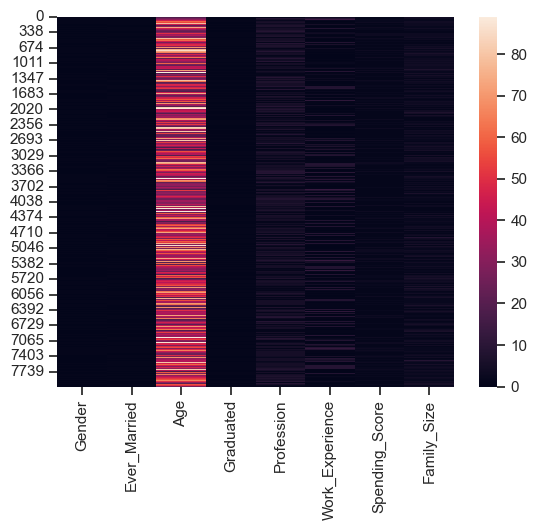

In [57]:
sns.heatmap(corr_df)

In [58]:
cormat = corr_df.corr()
round(cormat,2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,1.00,0.11,0.03,-0.03,0.03,-0.05,0.06,0.06
Ever_Married,0.11,1.00,0.57,0.20,0.21,-0.08,0.62,-0.08
Age,0.03,0.57,1.00,0.24,0.13,-0.17,0.42,-0.27
Graduated,-0.03,0.20,0.24,1.00,0.17,0.03,0.11,-0.22
Profession,0.03,0.21,0.13,0.17,1.00,0.07,0.15,-0.12
Work_Experience,-0.05,-0.08,-0.17,0.03,0.07,1.00,-0.07,-0.05
Spending_Score,0.06,0.62,0.42,0.11,0.15,-0.07,1.00,0.09
Family_Size,0.06,-0.08,-0.27,-0.22,-0.12,-0.05,0.09,1.00


<Axes: >

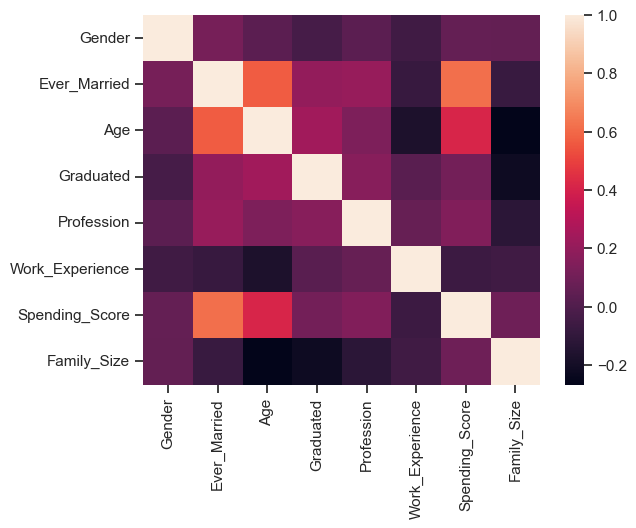

In [59]:
sns.heatmap(cormat)

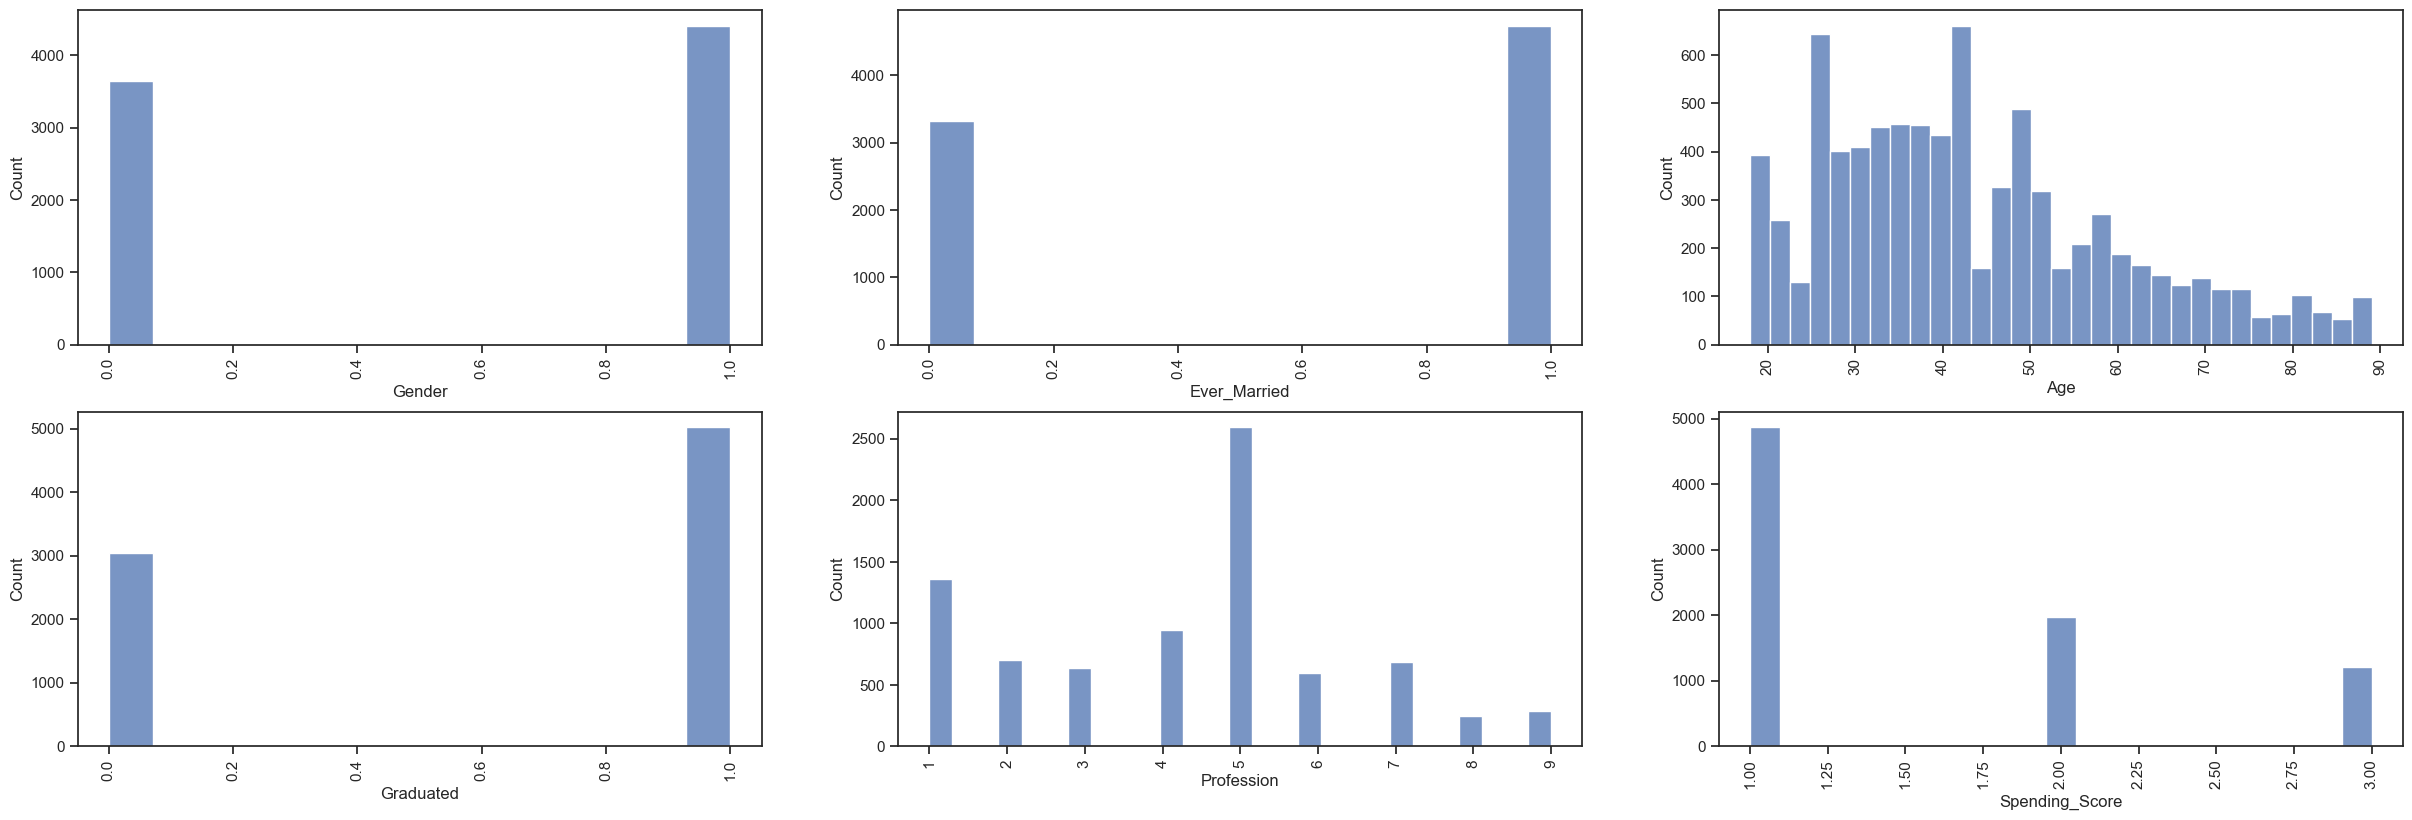

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
j=1
plt.figure(figsize=(30,20))
for i in df.select_dtypes(include='int64').columns:
  plt.subplot(4,3,j)
  sns.histplot(x=i, data=df)
  plt.xticks(rotation=90)
  j=j+1

<Axes: ylabel='Age'>

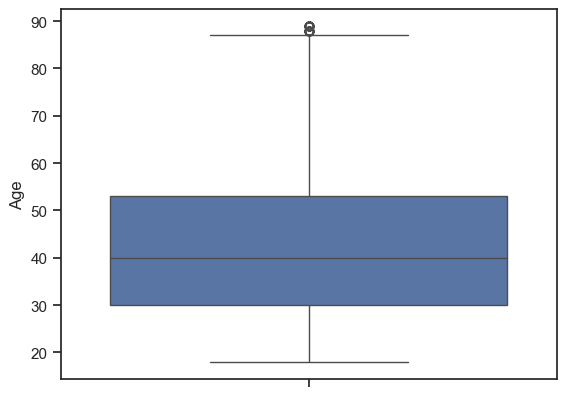

In [61]:
sns.boxplot(df['Age'])

<Axes: ylabel='Work_Experience'>

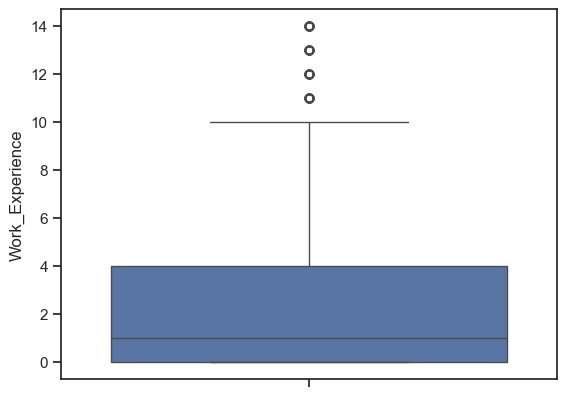

In [62]:
sns.boxplot(df['Work_Experience'])

We should not consider 14 as outlier, because people are able to work more than 30 years.
And also we should not consider 90 aged one as outlier. People may be can live.

MODEL TRAINING

In [63]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [64]:
from kmodes.kmodes import KModes

from kmodes.kprototypes import KPrototypes
df.head(2)
df_train = df.loc[:, 'Gender':'Family_Size']

In [65]:
categorical_features_idx=[0,1,3,4,5,6]
mark_array=df_train.values

In [66]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 856, ncost: 343028.718532526
Run: 1, iteration: 2/20, moves: 855, ncost: 321789.1186434505
Run: 1, iteration: 3/20, moves: 743, ncost: 303965.0228061675
Run: 1, iteration: 4/20, moves: 375, ncost: 299122.22045032564
Run: 1, iteration: 5/20, moves: 240, ncost: 297665.0065280613
Run: 1, iteration: 6/20, moves: 146, ncost: 296995.2482493021
Run: 1, iteration: 7/20, moves: 116, ncost: 296618.4813371437
Run: 1, iteration: 8/20, moves: 57, ncost: 296526.1218088928
Run: 1, iteration: 9/20, moves: 24, ncost: 296502.83376695734
Run: 1, iteration: 10/20, moves: 15, ncost: 296495.78426407825
Run: 1, iteration: 11/20, moves: 3, ncost: 296495.4596890435
Run: 1, iteration: 12/20, moves: 0, ncost: 296495.4596890435
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/2

In [67]:
print(kproto.cluster_centroids_)


[[40.25272068  2.57234986  1.          1.          1.          5.
   0.          1.        ]
 [74.78962002  2.08897127  1.          1.          1.          3.
   1.          3.        ]
 [26.53791558  3.42472917  1.          0.          0.          1.
   0.          1.        ]
 [54.27627958  2.81783159  1.          1.          1.          5.
   1.          2.        ]]


In [68]:
num_df=df.copy()
num_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,1,1.0,1,4.0,D
1,0,1,38,1,2,1.0,2,3.0,A
2,0,1,67,1,2,1.0,1,1.0,B
3,1,1,67,1,3,0.0,3,2.0,B
4,0,1,40,1,4,0.0,3,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,1,0.0,1,7.0,D
8064,1,0,35,0,6,3.0,1,4.0,D
8065,0,0,33,1,1,1.0,1,1.0,D
8066,0,0,27,1,1,1.0,1,4.0,B


In [69]:
def add_clusters_and_copy_attributes(df, original_df, mark_array, categorical_features_idx):
    clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
    df['cluster'] = list(clusters)
    train_num_df=df
    df[['Profession', 'Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'ID']] = original_df[
        ['Profession', 'Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'ID']
    ]
    return df,train_num_df

add_clusters_and_copy_attributes(df, original_df, mark_array, categorical_features_idx)


(      Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
 0       Male           No   22        No     Healthcare              1.0   
 1     Female          Yes   38       Yes       Engineer              1.0   
 2     Female          Yes   67       Yes       Engineer              1.0   
 3       Male          Yes   67       Yes         Lawyer              0.0   
 4     Female          Yes   40       Yes  Entertainment              0.0   
 ...      ...          ...  ...       ...            ...              ...   
 8063    Male           No   22        No     Healthcare              0.0   
 8064    Male           No   35        No      Executive              3.0   
 8065  Female           No   33       Yes     Healthcare              1.0   
 8066  Female           No   27       Yes     Healthcare              1.0   
 8067    Male          Yes   37       Yes      Executive              0.0   
 
      Spending_Score  Family_Size Segmentation  cluster      ID  
 0      

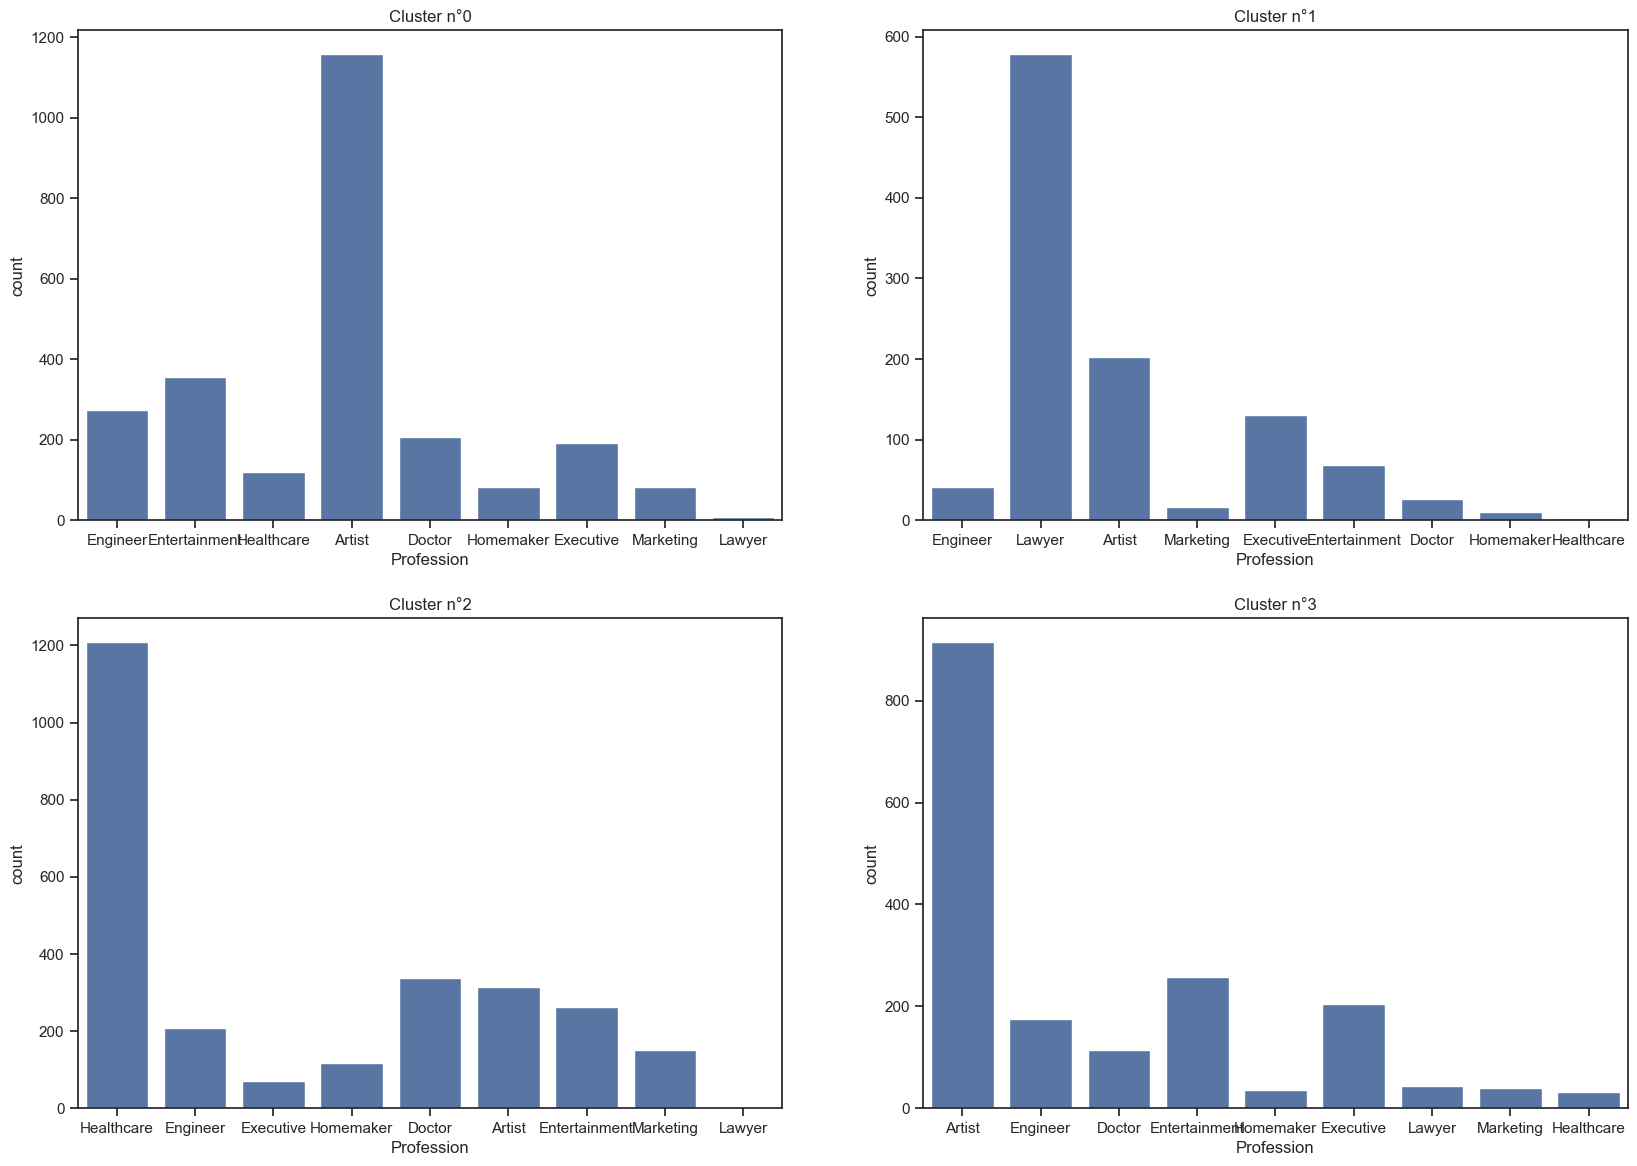

In [70]:
def plot_cluster_professions(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        plt.title(f"Cluster n°{cluster_number}")

        cluster_df = df.query(f"cluster == {cluster_number}")

        sns.countplot(data=cluster_df, x="Profession")

plot_cluster_professions(df, [0, 1, 2, 3])
plt.show()


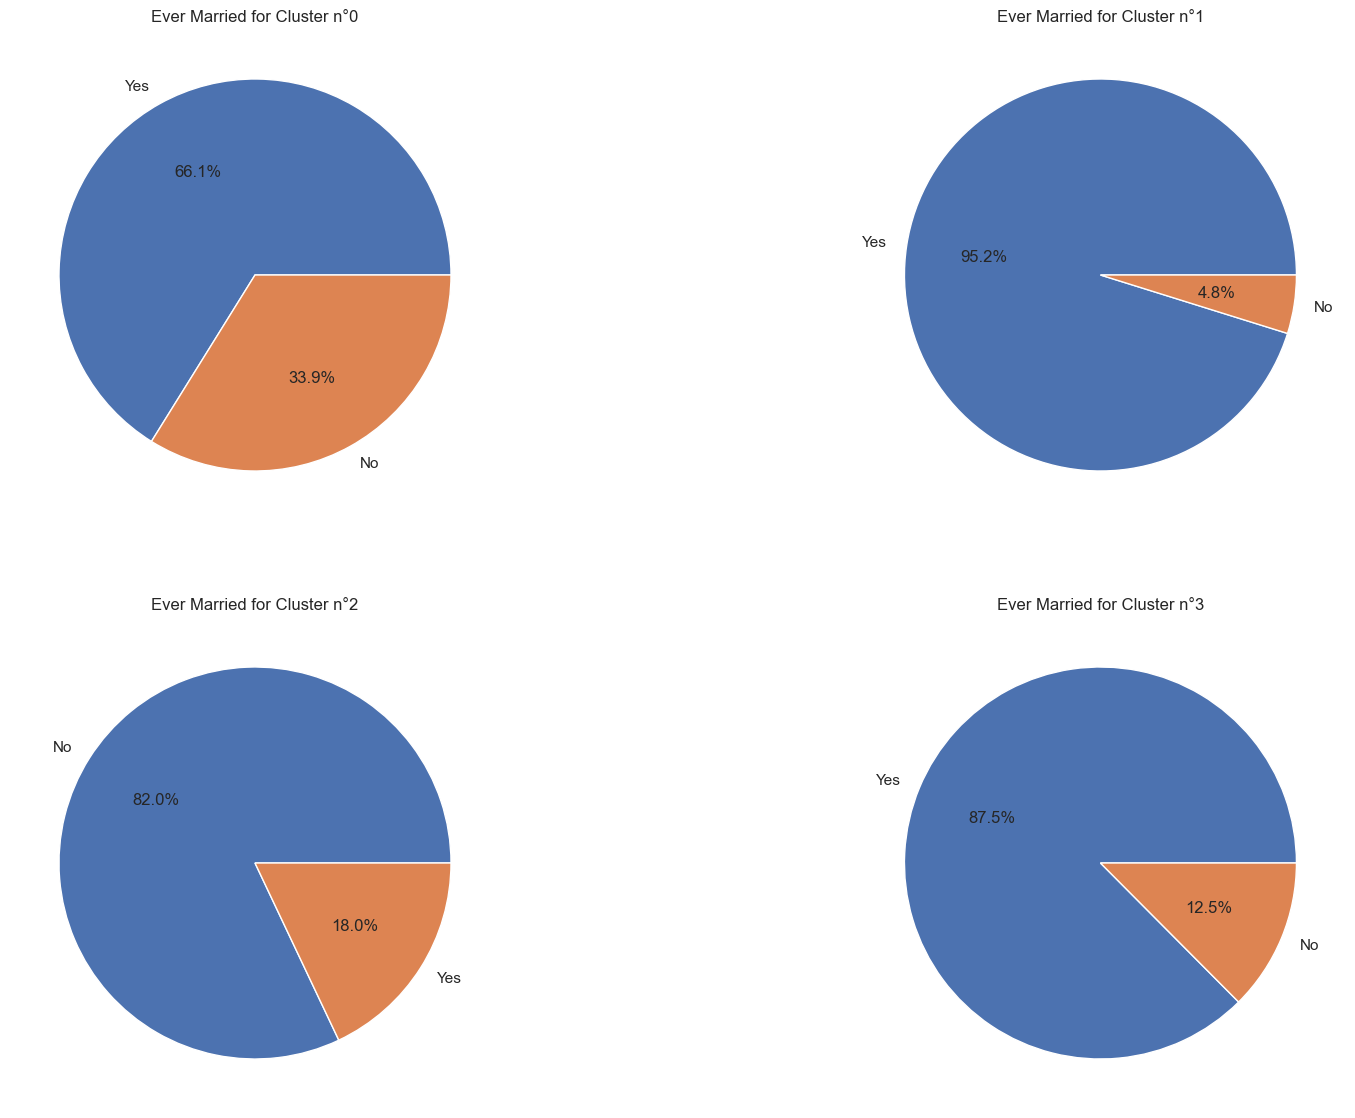

In [71]:
def plot_ever_married_pie_charts(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        cluster_df = df.query(f"cluster == {cluster_number}")

        ever_married_counts = cluster_df['Ever_Married'].value_counts()

        plt.pie(ever_married_counts, labels=ever_married_counts.index, autopct='%1.1f%%')

        plt.title(f'Ever Married for Cluster n°{cluster_number}')

    plt.show()

plot_ever_married_pie_charts(df, [0, 1, 2, 3])


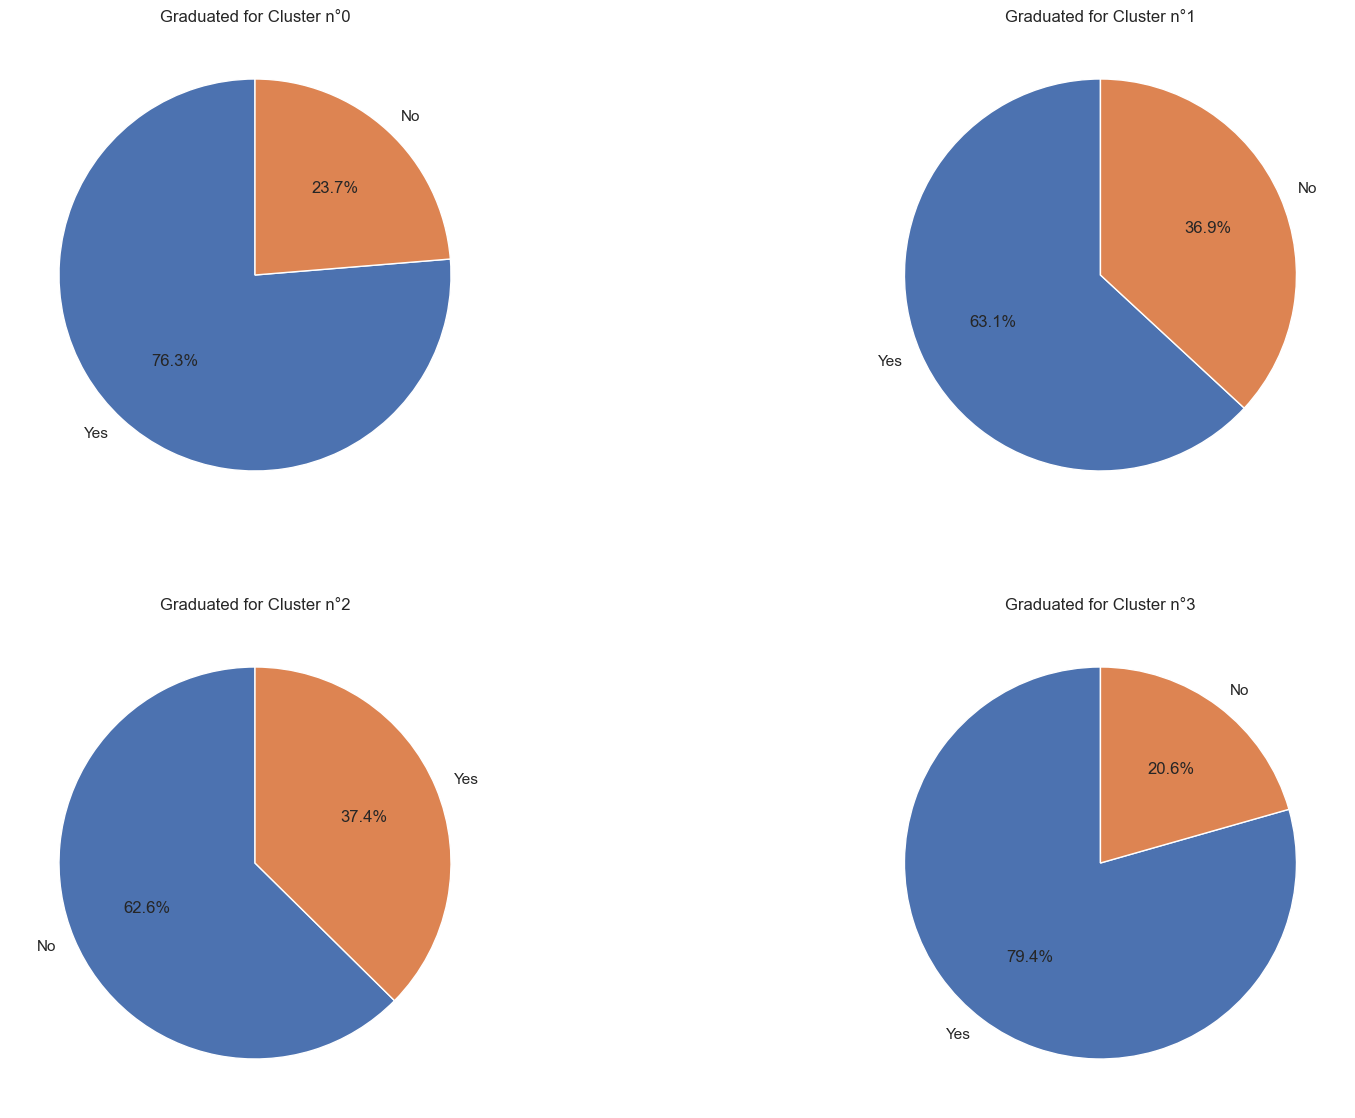

In [72]:
def plot_cluster_graduated_pie_chart(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        cluster_df = df.query(f"cluster == {cluster_number}")

        graduated_counts = cluster_df['Graduated'].value_counts()

        plt.pie(graduated_counts, labels=graduated_counts.index, autopct='%1.1f%%', startangle=90)

        plt.title(f'Graduated for Cluster n°{cluster_number}')

    plt.show()

plot_cluster_graduated_pie_chart(df, [0, 1, 2, 3])


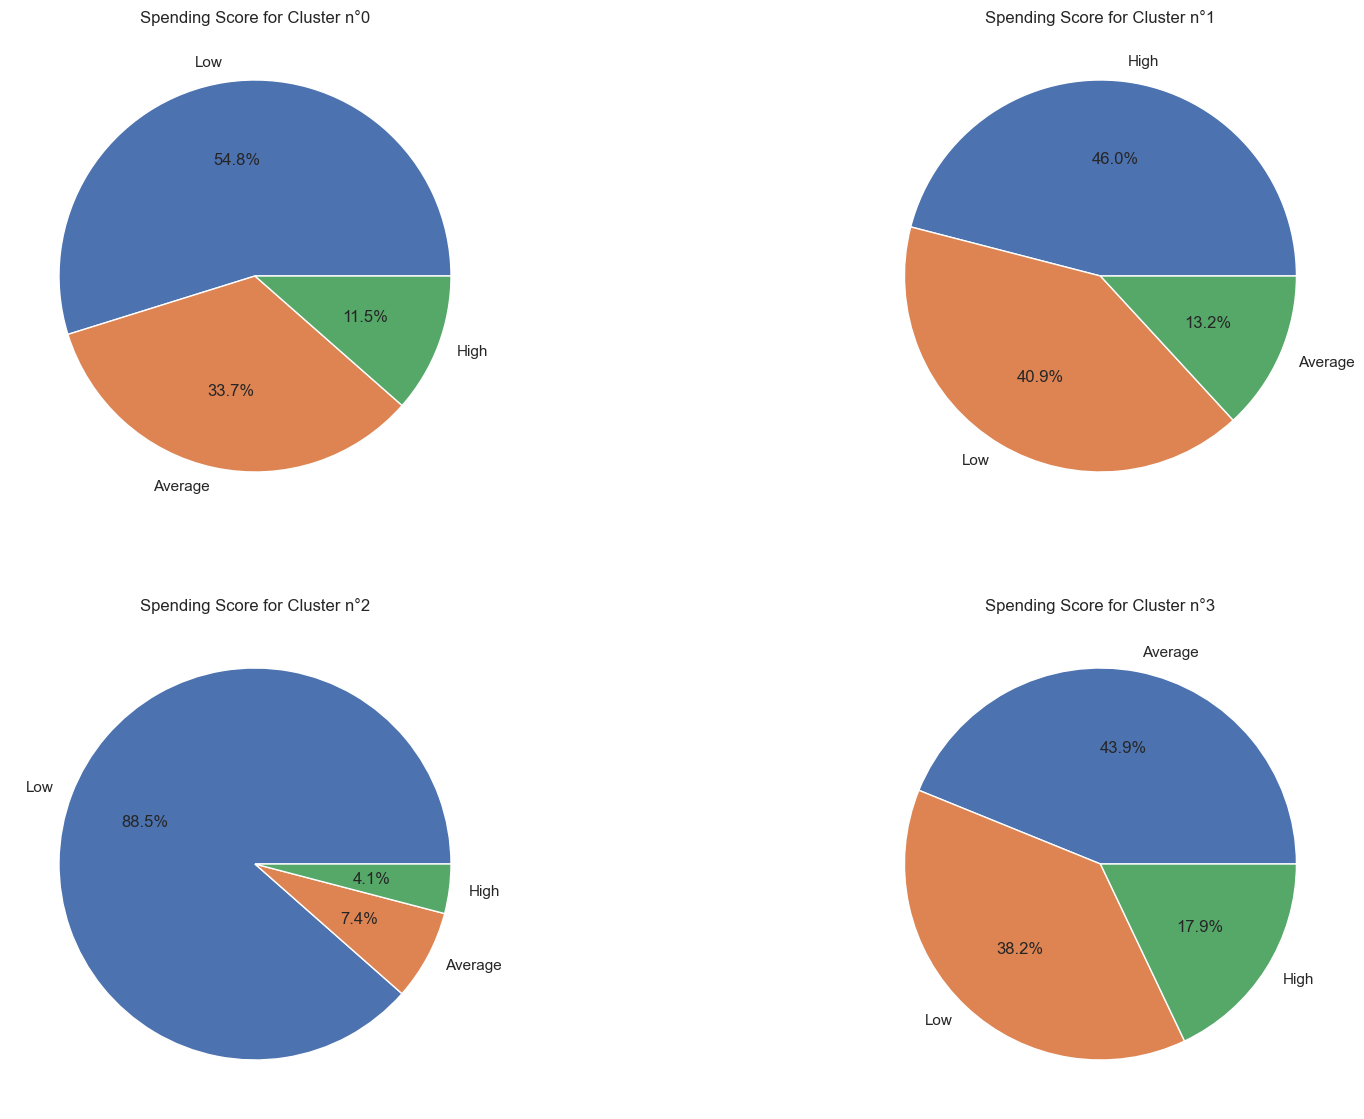

In [73]:
def plot_cluster_spending_score(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        cluster_df = df.query(f"cluster == {cluster_number}")

        data = cluster_df['Spending_Score'].value_counts()

        plt.pie(data, labels=data.index, autopct='%1.1f%%')

        plt.title(f'Spending Score for Cluster n°{cluster_number}')

    plt.show()

plot_cluster_spending_score(df, [0, 1, 2, 3])


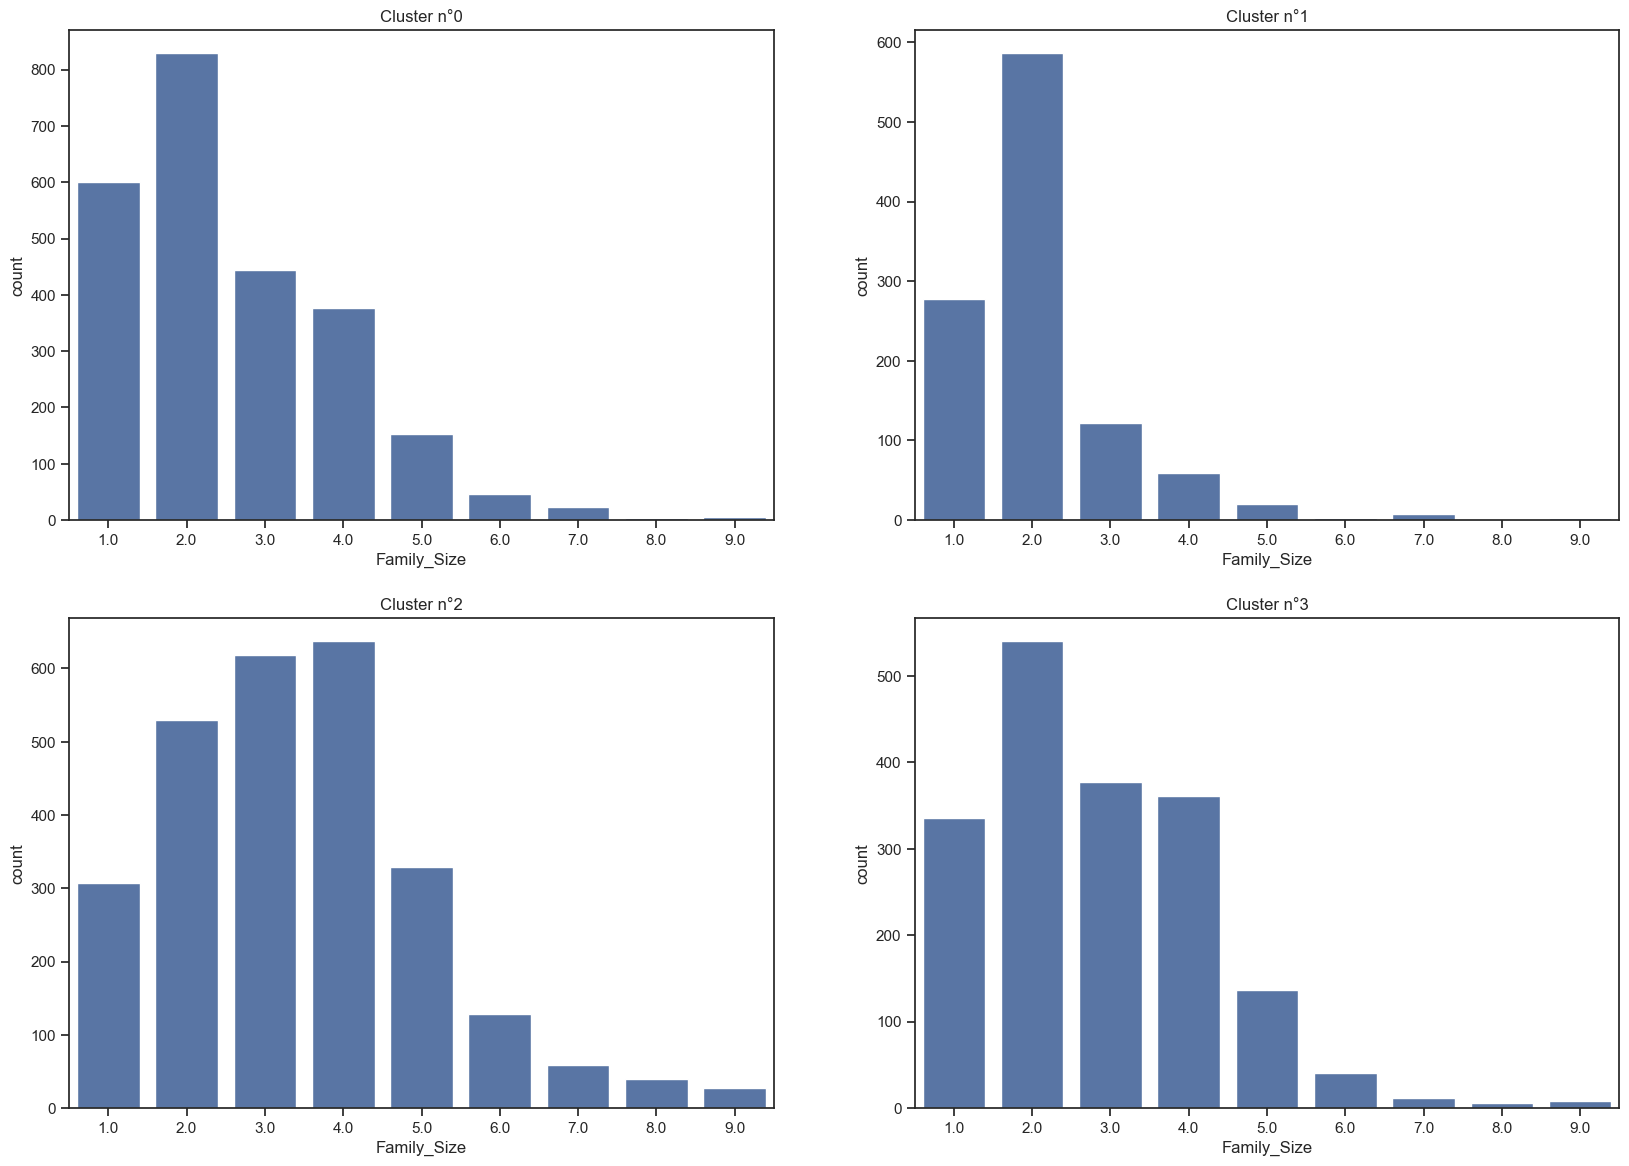

In [74]:
def plot_cluster_feature(df, cluster_numbers, feature, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        plt.title(f"Cluster n°{cluster_number}")

        cluster_df = df.query(f"cluster == {cluster_number}")

        sns.countplot(data=cluster_df, x=feature)

plot_cluster_feature(df, [0, 1, 2, 3], 'Family_Size')
plt.show()


In [75]:
def calculate_cluster_means(df, grouping_column, numeric_column):
    return df[[grouping_column, numeric_column]].groupby(by=[grouping_column]).mean()

cluster_age_means = calculate_cluster_means(df, 'cluster', 'Age')
print(cluster_age_means)


               Age
cluster           
0        40.252721
1        74.789620
2        26.537916
3        54.276280


Summary of Cluster Characteristics:

Cluster 0: *2
- Dominant Professions: Mostly in the fields of Arts, Entertainment, and Engineering.
- Marital Status: Mostly Married (66%) and some Singles (34%).
- Graduation Status: Majority Graduated (76%) and some Non-graduates (24%).
- Spending Score Distribution: Low (55%), Average (34%), High (11%).
- Family Size: Predominantly 2, with occasional instances of 1 or 3.
- Average Age: 40.
- Description: Cluster 0 represents customers in artistic, entertainment, and engineering fields with a balanced approach to spending. They are likely to be budget-conscious shoppers, willing to spend on average-priced items, and are in the prime of their careers, possibly maintaining a balance between work and personal life.

Cluster 1: *3
- Dominant Professions: Mainly in Healthcare, followed by Doctors and Artists.
- Marital Status: Mostly Single (82%) and a minority Married (18%).
- Graduation Status: Mostly Non-graduates (63%) with some Graduates (37%).
- Spending Score Distribution: Low (88%), Average (8%), High (4%).
- Family Size: Primarily 4, 3, or 2.
- Average Age: 26.
- Description: Cluster 1 represents customers in healthcare and artistic fields, primarily young and budget-conscious. They are likely to be family-oriented.

Cluster 2: *0
- Dominant Professions: Mainly in the Legal field, followed by Artists and Executives.
- Marital Status: Mostly Married (95%) with a small percentage Single (5%).
- Graduation Status: Majority Graduates (63%) and some Non-graduates (37%).
- Spending Score Distribution: Low (41%), Average (13%), High (46%).
- Family Size: Predominantly 2, with occasional instances of 1 or 3.
- Average Age: 74.
- Description: Cluster 2 represents customers in legal and artistic fields, mostly married and graduated, with a varied age range. They are likely to be budget-conscious shoppers, more likely to be single, and include a significant number of customers with a high spending score.

Cluster 3: *1
- Dominant Professions: Mainly in Arts, Entertainment, and Executives.
- Marital Status: Mostly Married (88%) with a minority Single (12%).
- Graduation Status: Majority Graduates (80%) and some Non-graduates (20%).
- Spending Score Distribution: Low (38%), Average (44%), High (18%).
- Family Size: Primarily 2, with occasional instances of 3 or 4.
- Average Age: 54.
- Description: Cluster 3 represents customers in artistic and executive fields, mostly married and graduated, with an average age of 54. This cluster has a higher number of customers with an average spending score.

Conclusion:
This analysis provides insights into the characteristics of each cluster. Feedback, opinions, and suggestions for improvement are welcomed.

In [76]:
df


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,cluster,ID
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D,2,462809
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,A,0,462643
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,1,466315
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,1,461735
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A,0,462669
...,...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Healthcare,0.0,Low,7.0,D,2,464018
8064,Male,No,35,No,Executive,3.0,Low,4.0,D,0,464685
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D,2,465406
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B,2,467299


In [77]:
num_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,1,1.0,1,4.0,D
1,0,1,38,1,2,1.0,2,3.0,A
2,0,1,67,1,2,1.0,1,1.0,B
3,1,1,67,1,3,0.0,3,2.0,B
4,0,1,40,1,4,0.0,3,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,1,0.0,1,7.0,D
8064,1,0,35,0,6,3.0,1,4.0,D
8065,0,0,33,1,1,1.0,1,1.0,D
8066,0,0,27,1,1,1.0,1,4.0,B


Predict the test dataset

Importing Data set

In [78]:
pd.read_csv('/Users/leo/Downloads/archive/Test.csv').head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


Here, we are deleting the var_1 and segmntation columns, because these two unnecessary.

In [79]:
df=pd.read_csv('/Users/leo/Downloads/archive/Test.csv')
df=df.drop(['Var_1'],axis=1)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0
...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [80]:
df.shape

(2627, 9)

In [81]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 184.8+ KB


In [82]:
df.describe()


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


To categorize better into groups, we added an another coloumn "categorized_ages"

In [83]:
def create_age_category_column(dataframe):
    bins = [0, 18, 25, 35, 46, 100]
    labels = ['0-18', '19-25', '26-35', '36-46', '47+']
    dataframe['categorized_ages'] = pd.cut(dataframe['Age'], bins=bins, labels=labels)
    return dataframe

df = create_age_category_column(df)
df.head(5)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,categorized_ages
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,36-46
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,36-46
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,47+
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,47+
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,19-25


Checking Null values in column

In [84]:
def count_null_values(dataframe, field):
    return dataframe[field].isnull().sum()

print("Missing Values in each column:")
for column in df.columns:
    print(f"{column} : {count_null_values(df, column)}")


Missing Values in each column:
ID : 0
Gender : 0
Ever_Married : 50
Age : 0
Graduated : 24
Profession : 38
Work_Experience : 269
Spending_Score : 0
Family_Size : 113
categorized_ages : 0


In [85]:
df.isna().sum().sum()

494

From here onwards, we are going to replace null values with related one, by comparing and analysing the other rows.

In [86]:
def groupby_count(df, groupby_cols, count_col, filter_cols=None):
    selected_cols = filter_cols + groupby_cols + [count_col] if filter_cols else groupby_cols + [count_col]
    grouped_df = df[selected_cols].groupby(by=groupby_cols).count()
    return grouped_df


In [87]:
import tabulate

result_table = groupby_count(df, ['Spending_Score', 'Ever_Married'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))



+----------------+--------------+------+
| Spending_Score | Ever_Married |  ID  |
+----------------+--------------+------+
|    Average     |     Yes      | 610  |
|      High      |     Yes      | 375  |
|      Low       |      No      | 1057 |
|      Low       |     Yes      | 535  |
+----------------+--------------+------+


In [88]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [89]:
import tabulate

result_table = groupby_count(df, ['Profession', 'Ever_Married'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+---------------+--------------+-----+
|  Profession   | Ever_Married | ID  |
+---------------+--------------+-----+
|    Artist     |      No      | 251 |
|    Artist     |     Yes      | 542 |
|    Doctor     |      No      | 113 |
|    Doctor     |     Yes      | 124 |
|   Engineer    |      No      | 85  |
|   Engineer    |     Yes      | 143 |
| Entertainment |      No      | 109 |
| Entertainment |     Yes      | 187 |
|   Executive   |      No      |  9  |
|   Executive   |     Yes      | 163 |
|  Healthcare   |      No      | 362 |
|  Healthcare   |     Yes      | 47  |
|   Homemaker   |      No      | 35  |
|   Homemaker   |     Yes      | 44  |
|    Lawyer     |      No      | 14  |
|    Lawyer     |     Yes      | 204 |
|   Marketing   |      No      | 66  |
|   Marketing   |     Yes      | 43  |
+---------------+--------------+-----+


In [90]:
import tabulate

result_table = groupby_count(df, ['categorized_ages', 'Ever_Married'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+--------------+-----+
| categorized_ages | Ever_Married | ID  |
+------------------+--------------+-----+
|       0-18       |      No      | 39  |
|       0-18       |     Yes      |  2  |
|      19-25       |      No      | 255 |
|      19-25       |     Yes      | 23  |
|      26-35       |      No      | 436 |
|      26-35       |     Yes      | 164 |
|      36-46       |      No      | 239 |
|      36-46       |     Yes      | 459 |
|       47+        |      No      | 88  |
|       47+        |     Yes      | 872 |
+------------------+--------------+-----+


From above cells, we conclude that
whenever "spending_score" is "high" the "ever_married" column would be "yes"

In [91]:
def update_ever_married(df, condition, value):
    x = df.query(condition + " and Ever_Married.isna()")
    x['Ever_Married'] = value
    df.update(x)

update_ever_married(df, "Spending_Score == 'High'", 'Yes')
update_ever_married(df, "Profession == 'Healthcare'", 'No')
update_ever_married(df, "categorized_ages == '47+'", 'Yes')
update_ever_married(df, "categorized_ages == '19-25'", 'No')
update_ever_married(df, "categorized_ages == '26-35'", 'No')


In [92]:
print(count_null_values(df,"Ever_Married"))


9


In [93]:
df.query("Ever_Married.isna()")['categorized_ages'].unique()


['36-46']
Categories (5, object): ['0-18' < '19-25' < '26-35' < '36-46' < '47+']

In [94]:
result_table = groupby_count(df.query("categorized_ages == '36-46'"), ['categorized_ages', 'Profession', 'Ever_Married'], 'ID').reset_index()

print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+---------------+--------------+-----+
| categorized_ages |  Profession   | Ever_Married | ID  |
+------------------+---------------+--------------+-----+
|       0-18       |    Artist     |      No      |  0  |
|       0-18       |    Artist     |     Yes      |  0  |
|       0-18       |    Doctor     |      No      |  0  |
|       0-18       |    Doctor     |     Yes      |  0  |
|       0-18       |   Engineer    |      No      |  0  |
|       0-18       |   Engineer    |     Yes      |  0  |
|       0-18       | Entertainment |      No      |  0  |
|       0-18       | Entertainment |     Yes      |  0  |
|       0-18       |   Executive   |      No      |  0  |
|       0-18       |   Executive   |     Yes      |  0  |
|       0-18       |  Healthcare   |      No      |  0  |
|       0-18       |  Healthcare   |     Yes      |  0  |
|       0-18       |   Homemaker   |      No      |  0  |
|       0-18       |   Homemaker   |     Yes      |  0  |
|       0-18  

In [95]:
print(count_null_values(df,'Ever_Married'))

9


In [96]:
def update_ever_married_condition(df, age_cat_condition, profession_condition):
    x = df.query(f"{age_cat_condition} and Ever_Married.isna() and {profession_condition}")
    y = df.query(f"{age_cat_condition} and Ever_Married.isna() and not {profession_condition}")

    x['Ever_Married'] = 'Yes'
    y['Ever_Married'] = 'No'

    df.update(x)
    df.update(y)

update_ever_married_condition(df, "categorized_ages=='36-46'", "Profession != 'Marketing'")

print(count_null_values(df,'Ever_Married'))


0


Till now, we can conclude :

All Average / High Spending_Score are Married 

People in Healthcare profession are mostly not married


47+ People are mostly married


19-25 People are mostly not married


26-35 People are mostly not married



Now, Let's look at graduated vs categorized_ages to make our clustering easier

In [97]:
count_null_values(df,'Graduated')


24

In [98]:
result_table = groupby_count(df, ['categorized_ages', 'Graduated'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+-----------+-----+
| categorized_ages | Graduated | ID  |
+------------------+-----------+-----+
|       0-18       |    No     | 40  |
|       0-18       |    Yes    |  1  |
|      19-25       |    No     | 246 |
|      19-25       |    Yes    | 36  |
|      26-35       |    No     | 270 |
|      26-35       |    Yes    | 338 |
|      36-46       |    No     | 167 |
|      36-46       |    Yes    | 536 |
|       47+        |    No     | 278 |
|       47+        |    Yes    | 691 |
+------------------+-----------+-----+


In [99]:
result_table = groupby_count(df, ['Profession', 'Graduated'], 'ID').reset_index()
print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+---------------+-----------+-----+
|  Profession   | Graduated | ID  |
+---------------+-----------+-----+
|    Artist     |    No     | 94  |
|    Artist     |    Yes    | 701 |
|    Doctor     |    No     | 90  |
|    Doctor     |    Yes    | 151 |
|   Engineer    |    No     | 124 |
|   Engineer    |    Yes    | 112 |
| Entertainment |    No     | 115 |
| Entertainment |    Yes    | 182 |
|   Executive   |    No     | 86  |
|   Executive   |    Yes    | 89  |
|  Healthcare   |    No     | 275 |
|  Healthcare   |    Yes    | 139 |
|   Homemaker   |    No     | 38  |
|   Homemaker   |    Yes    | 44  |
|    Lawyer     |    No     | 92  |
|    Lawyer     |    Yes    | 124 |
|   Marketing   |    No     | 69  |
|   Marketing   |    Yes    | 41  |
+---------------+-----------+-----+


In [100]:
print(groupby_count(df, ['Ever_Married','Graduated'], 'ID') )


                          ID
Ever_Married Graduated      
No           No          537
             Yes         528
Yes          No          464
             Yes        1074


In [101]:
def update_graduated_condition(df, condition, value):
    x = df.query(f"{condition} and Graduated.isna()")
    x['Graduated'] = value
    df.update(x)

update_graduated_condition(df, "(categorized_ages=='0-18' or categorized_ages=='19-25')", 'No')
update_graduated_condition(df, "Profession=='Artist'", 'Yes')
update_graduated_condition(df, "(categorized_ages=='47+')", 'Yes')
update_graduated_condition(df, "Ever_Married=='Yes'", 'Yes')


In [102]:
count_null_values(df,'Graduated')


1

In [103]:
df=df.drop(df.query("Graduated.isna()").index)


From Graduated, we have learnt 

0-18 People Are mostly not graduated

19-25 People are mostly not graduated

47+ People are mostly graduated

Most Artist are graduated

There is more chance that married people are Graduated


In [104]:
count_null_values(df,"Profession")


38

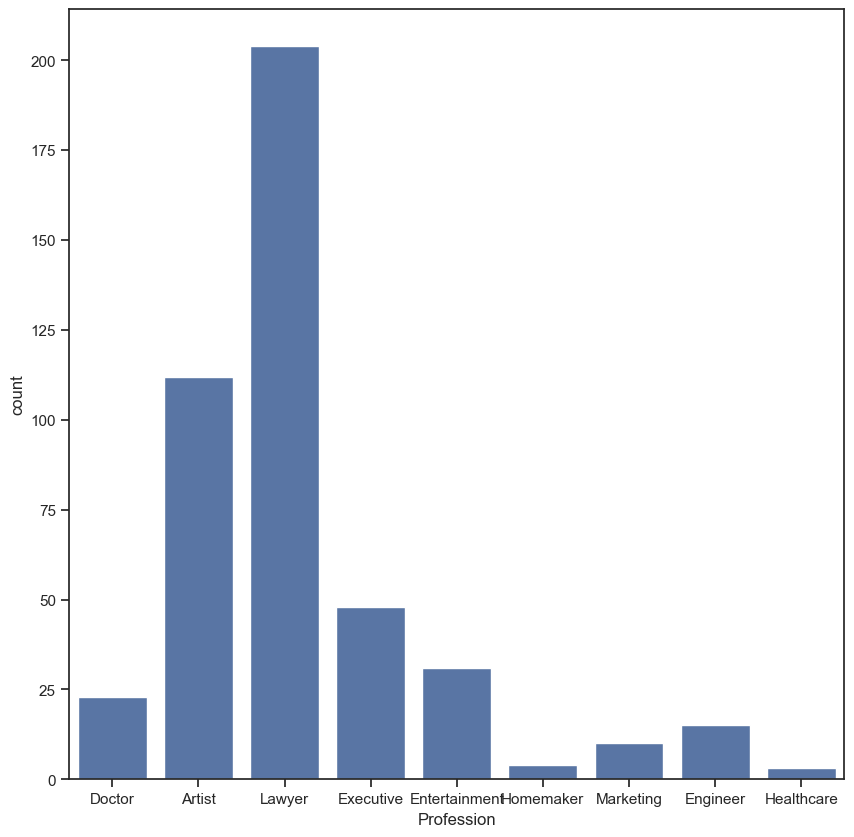

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_count_by_profession(df, condition, figsize=(10, 10)):
    filtered_df = df.query(condition)
    plt.figure(figsize=figsize)
    sns.countplot(data=filtered_df, x="Profession")

plot_count_by_profession(df, "Age > 60")
plt.show()


In [106]:
x=df.query("Age>60")
groupby_count(x, ['Spending_Score','Profession'], 'ID') 


ID
Spending_Score Profession        
Average        Artist          45
               Doctor          12
               Engineer         2
               Entertainment   14
               Executive        4
               Healthcare       1
               Lawyer           5
               Marketing        2
High           Artist          28
               Doctor           2
               Engineer         2
               Entertainment    4
               Executive       31
               Healthcare       1
               Homemaker        1
               Lawyer         112
               Marketing        4
Low            Artist          39
               Doctor           9
               Engineer        11
               Entertainment   13
               Executive       13
               Healthcare       1
               Homemaker        3
               Lawyer          87
               Marketing        4

In [107]:
def update_profession_condition(df, age_condition, profession_condition, spending_condition, new_profession):
    x = df.query(f"{age_condition} and {profession_condition} and {spending_condition}")
    x['Profession'] = new_profession
    df.update(x)

update_profession_condition(df, "Age > 60", "Profession.isna()", "Spending_Score=='Average'", 'Artist')
update_profession_condition(df, "Age > 60", "Profession.isna()",
                             "(Spending_Score=='Low' or Spending_Score=='High')", 'Lawyer')


In [108]:
def update_profession_for_graduates(df, graduated_value, new_profession):
    x = df.query(f"Graduated=='{graduated_value}' and Profession.isna()")
    x['Profession'] = new_profession
    df.update(x)

update_profession_for_graduates(df, 'Yes', 'Artist')


In [109]:

result_table = groupby_count(df, ['categorized_ages', 'Profession'], 'ID').reset_index()

print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+------------------+---------------+-----+
| categorized_ages |  Profession   | ID  |
+------------------+---------------+-----+
|       0-18       |    Artist     |  1  |
|       0-18       |    Doctor     |  5  |
|       0-18       |   Engineer    |  3  |
|       0-18       | Entertainment |  3  |
|       0-18       |   Executive   |  0  |
|       0-18       |  Healthcare   | 27  |
|       0-18       |   Homemaker   |  0  |
|       0-18       |    Lawyer     |  0  |
|       0-18       |   Marketing   |  3  |
|      19-25       |    Artist     | 13  |
|      19-25       |    Doctor     | 27  |
|      19-25       |   Engineer    | 12  |
|      19-25       | Entertainment | 10  |
|      19-25       |   Executive   |  3  |
|      19-25       |  Healthcare   | 184 |
|      19-25       |   Homemaker   |  9  |
|      19-25       |    Lawyer     |  2  |
|      19-25       |   Marketing   | 21  |
|      26-35       |    Artist     | 124 |
|      26-35       |    Doctor     | 91  |
|      26-3

In [110]:
def update_profession_based_on_age(df, age_condition, new_profession):
    x = df.query(f"{age_condition} and Profession.isna()")
    x['Profession'] = new_profession
    df.update(x)

update_profession_based_on_age(df, "(categorized_ages=='0-18' or categorized_ages=='19-25')", 'Healthcare')
update_profession_based_on_age(df, "Age > 47 and Age < 60", 'Artist')


In [111]:

result_table = groupby_count(df, ['Ever_Married', 'Profession'], 'ID').reset_index()

print(tabulate.tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False))


+--------------+---------------+-----+
| Ever_Married |  Profession   | ID  |
+--------------+---------------+-----+
|      No      |    Artist     | 257 |
|      No      |    Doctor     | 116 |
|      No      |   Engineer    | 85  |
|      No      | Entertainment | 109 |
|      No      |   Executive   |  9  |
|      No      |  Healthcare   | 375 |
|      No      |   Homemaker   | 37  |
|      No      |    Lawyer     | 14  |
|      No      |   Marketing   | 67  |
|     Yes      |    Artist     | 569 |
|     Yes      |    Doctor     | 126 |
|     Yes      |   Engineer    | 151 |
|     Yes      | Entertainment | 191 |
|     Yes      |   Executive   | 167 |
|     Yes      |  Healthcare   | 47  |
|     Yes      |   Homemaker   | 45  |
|     Yes      |    Lawyer     | 210 |
|     Yes      |   Marketing   | 44  |
+--------------+---------------+-----+


In [112]:
def update_profession_based_on_marriage(df, marriage_status, new_profession):
    x = df.query(f"Ever_Married=='{marriage_status}' and Profession.isna()")
    x['Profession'] = new_profession
    df.update(x)

update_profession_based_on_marriage(df, 'Yes', 'Artist')
update_profession_based_on_marriage(df, 'No', 'Healthcare')


from profession,

People that are 60+ years old are :

mostly Artist if they have an average Spending_Score

mostly Lawyers if they have a High/Low Spending_Score

Not Married People have a Healthcare profession

Married People are Artists ! (Again)

In [113]:
count_null_values(df,"Work_Experience")


269

In [114]:
percentiles_list = [i * 0.1 for i in range(10)]
result = df['Work_Experience'].describe(percentiles=percentiles_list)

print(result)


count    2357.000000
mean        2.551124
std         3.341048
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         3.000000
80%         6.000000
90%         8.000000
max        14.000000
Name: Work_Experience, dtype: float64


In [115]:
def fillna_forward_fill(df, column):
    df[column] = df[column].fillna(method='pad')


fillna_forward_fill(df, 'Work_Experience')


In [116]:
def custom_describe_with_percentiles(series, percentiles):
    return series.describe(percentiles=percentiles)

percentiles_list = [i * 0.1 for i in range(10)]
result = custom_describe_with_percentiles(df['Work_Experience'], percentiles_list)

print(result)


count    2626.000000
mean        2.589490
std         3.362395
min         0.000000
0%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         3.000000
80%         6.000000
90%         8.000000
max        14.000000
Name: Work_Experience, dtype: float64


for working experince,padding was done to see if there will be any changes, nothing much so we can proceed!

In [117]:
count_null_values(df,"Family_Size")


113

In [118]:
def custom_describe_with_percentiles(series, percentiles):
    return series.describe(percentiles=percentiles)

percentiles_list = [i * 0.1 for i in range(10)]
result = custom_describe_with_percentiles(df['Family_Size'], percentiles_list)

print(result)


count    2513.000000
mean        2.826104
std         1.551787
min         1.000000
0%          1.000000
10%         1.000000
20%         1.000000
30%         2.000000
40%         2.000000
50%         2.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
max         9.000000
Name: Family_Size, dtype: float64


In [119]:
def fillna_forward_fill(df, column):
    df[column] = df[column].fillna(method='pad')

fillna_forward_fill(df, 'Family_Size')


In [120]:
def custom_describe_with_percentiles(series, percentiles):
    return series.describe(percentiles=percentiles)

family_size_description = custom_describe_with_percentiles(df['Family_Size'], [i * 0.1 for i in range(10)])
print(family_size_description)


count    2626.000000
mean        2.833206
std         1.571041
min         1.000000
0%          1.000000
10%         1.000000
20%         1.000000
30%         2.000000
40%         2.000000
50%         2.000000
60%         3.000000
70%         4.000000
80%         4.000000
90%         5.000000
max         9.000000
Name: Family_Size, dtype: float64


In [121]:
def preprocess_data(input_df):
    df = input_df.copy()

    df = df.drop(labels=['ID', 'categorized_ages'], axis=1)

    professions = list(df['Profession'].unique())
    df['Profession'] = df['Profession'].apply(lambda x: professions.index(x) + 1)

    df['Ever_Married'] = df['Ever_Married'].map({'Yes': 1, 'No': 0})
    df['Graduated'] = df['Graduated'].map({'Yes': 1, 'No': 0})
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    spending_scores = list(df['Spending_Score'].unique())
    df['Spending_Score'] = df['Spending_Score'].apply(lambda x: spending_scores.index(x) + 1)

    return df

original_df = df  
df = preprocess_data(original_df)


In [122]:
df.head(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,1,0.0,1,1.0
1,1,1,37,1,2,8.0,2,4.0
2,0,1,69,0,3,0.0,1,1.0
3,1,1,59,0,4,11.0,3,2.0
4,0,0,19,0,5,11.0,1,4.0


Here, We are checking null values after preprocessing tha data

In [123]:
def count_null_values(dataframe, field):
    return dataframe[field].isnull().sum()

print("Missing Values in each column:")
for column in df.columns:
    print(f"{column} : {count_null_values(df, column)}")


Missing Values in each column:
Gender : 0
Ever_Married : 0
Age : 0
Graduated : 0
Profession : 0
Work_Experience : 0
Spending_Score : 0
Family_Size : 0


<Axes: >

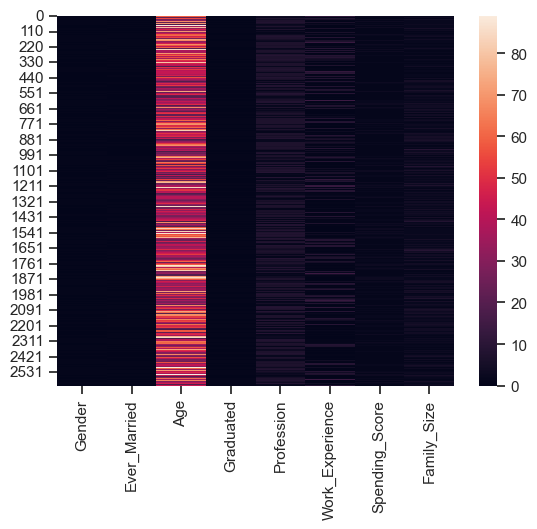

In [124]:
sns.heatmap(df)

In [125]:
cormat = df.corr()
round(cormat,2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
Gender,1.00,0.11,0.01,-0.05,0.05,-0.07,0.05,0.07
Ever_Married,0.11,1.00,0.58,0.21,0.16,-0.11,0.60,-0.09
Age,0.01,0.58,1.00,0.24,0.08,-0.19,0.44,-0.28
Graduated,-0.05,0.21,0.24,1.00,0.30,0.04,0.09,-0.26
Profession,0.05,0.16,0.08,0.30,1.00,0.08,0.03,-0.18
Work_Experience,-0.07,-0.11,-0.19,0.04,0.08,1.00,-0.07,-0.07
Spending_Score,0.05,0.60,0.44,0.09,0.03,-0.07,1.00,0.07
Family_Size,0.07,-0.09,-0.28,-0.26,-0.18,-0.07,0.07,1.00


<Axes: >

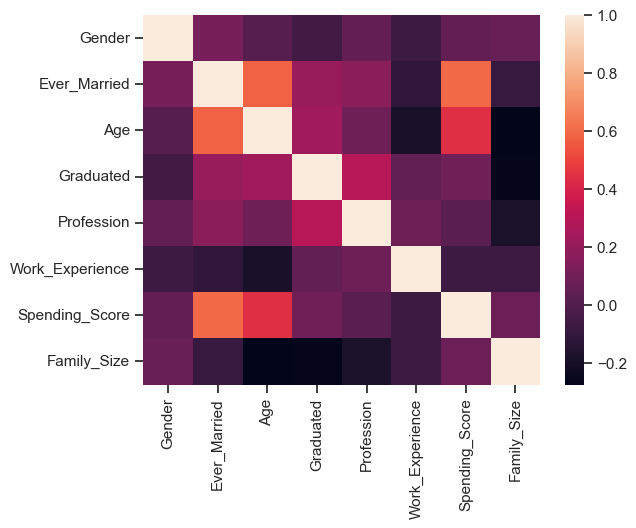

In [126]:
sns.heatmap(cormat)

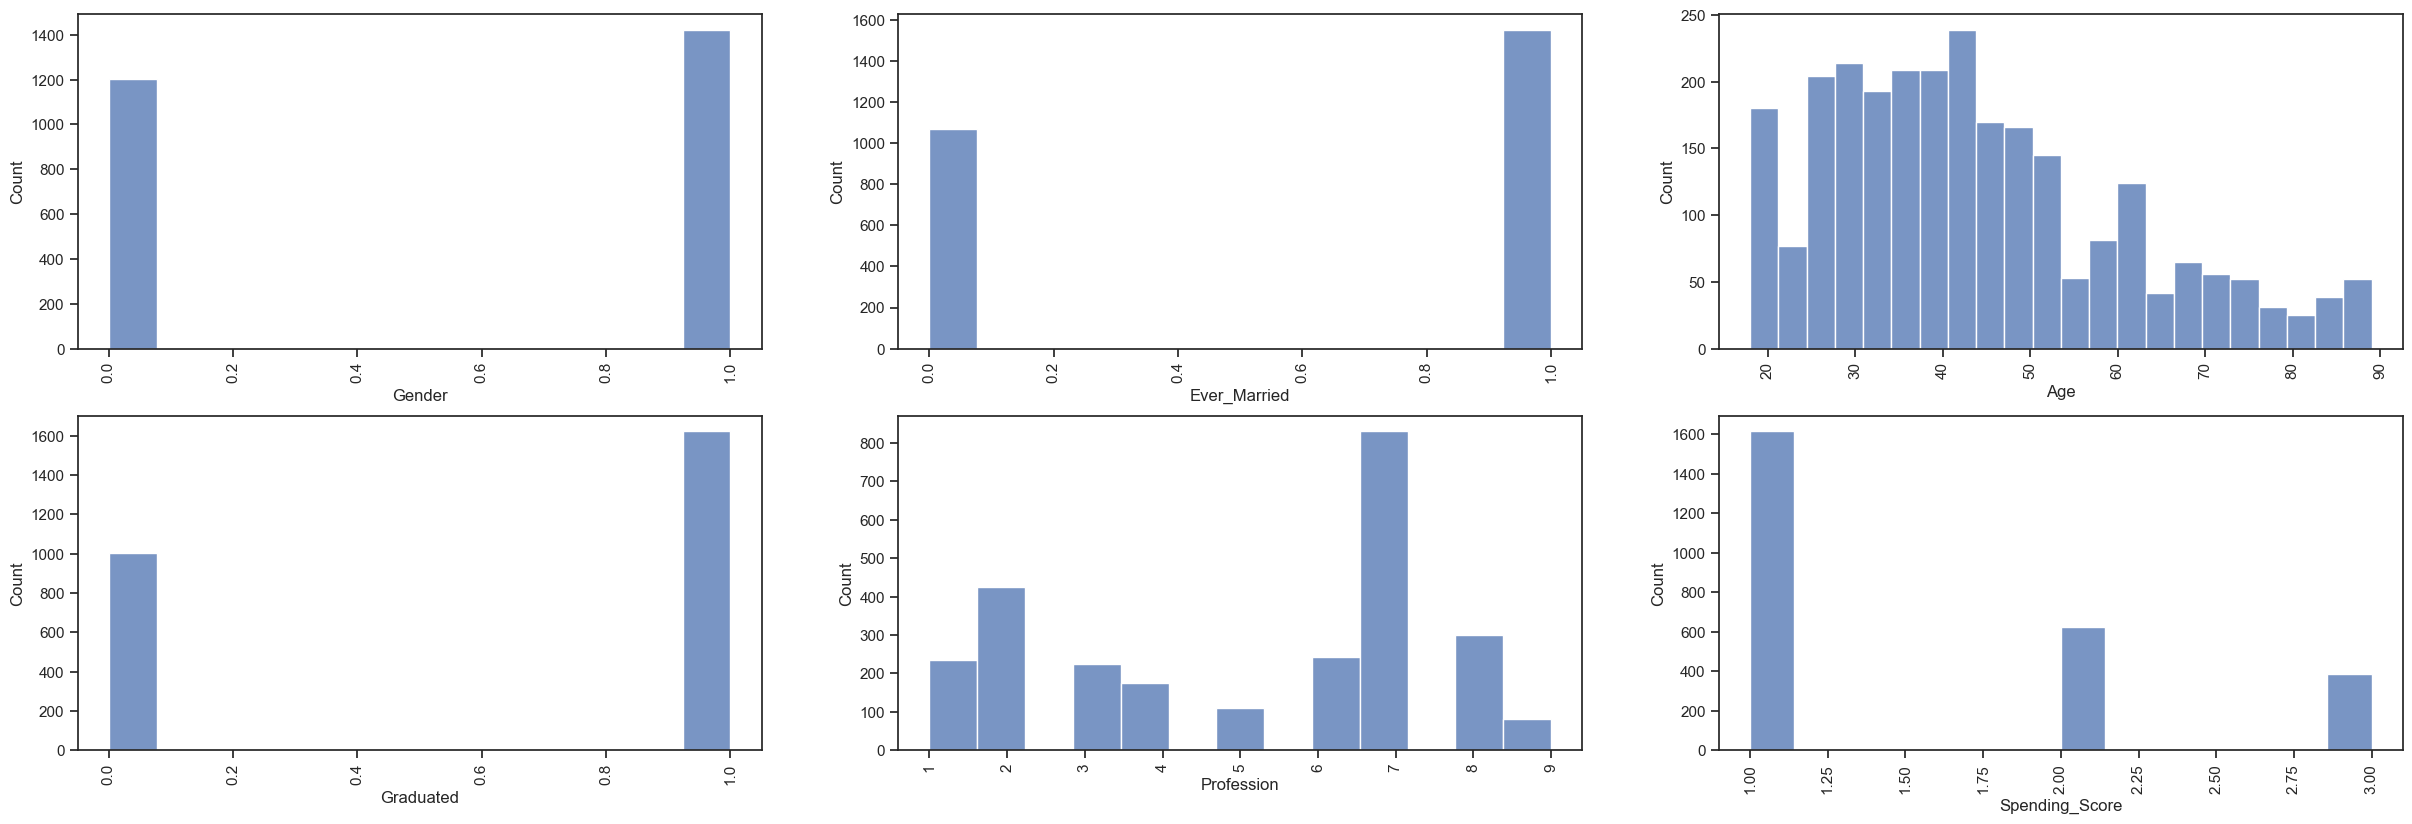

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
j=1
plt.figure(figsize=(30,20))
for i in df.select_dtypes(include='int64').columns:
  plt.subplot(4,3,j)
  sns.histplot(x=i, data=df)
  plt.xticks(rotation=90)
  j=j+1

<Axes: ylabel='Age'>

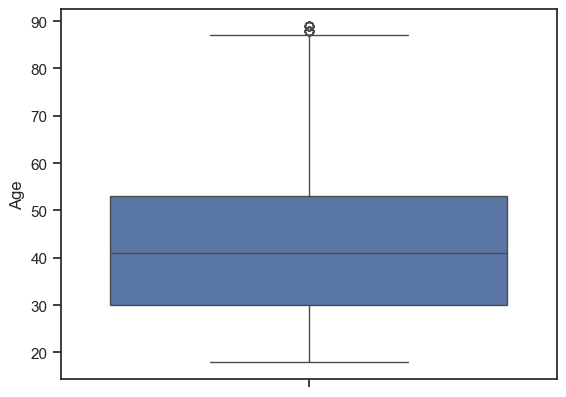

In [128]:
sns.boxplot(df['Age'])

<Axes: ylabel='Work_Experience'>

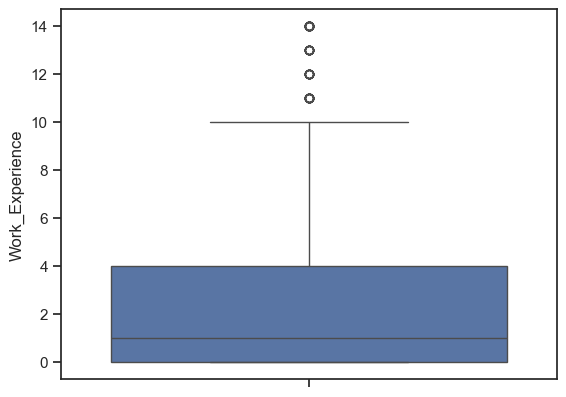

In [129]:
sns.boxplot(df['Work_Experience'])

We should not consider 14 as outlier, because people are able to work more than 30 years.
And also we should not consider 90 aged one as outlier. People may be can live.

MODEL TRAINING

In [130]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [131]:
from kmodes.kmodes import KModes

from kmodes.kprototypes import KPrototypes
df.head(2)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,1,0.0,1,1.0
1,1,1,37,1,2,8.0,2,4.0


In [132]:
categorical_features_idx=[0,1,3,4,5,6]
mark_array=df.values

In [133]:
num_testdf=df.copy()
num_testdf

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,1,0.0,1,1.0
1,1,1,37,1,2,8.0,2,4.0
2,0,1,69,0,3,0.0,1,1.0
3,1,1,59,0,4,11.0,3,2.0
4,0,0,19,0,5,11.0,1,4.0
...,...,...,...,...,...,...,...,...
2622,1,0,29,0,2,9.0,1,4.0
2623,0,0,35,1,6,1.0,1,1.0
2624,0,0,53,1,8,1.0,1,2.0
2625,1,1,47,1,4,1.0,3,5.0


In [134]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)




Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 612, ncost: 141561.64122377356
Run: 1, iteration: 2/20, moves: 315, ncost: 125385.34103779693
Run: 1, iteration: 3/20, moves: 285, ncost: 118448.50683800284
Run: 1, iteration: 4/20, moves: 219, ncost: 114281.70632187364
Run: 1, iteration: 5/20, moves: 255, ncost: 108381.66752922692
Run: 1, iteration: 6/20, moves: 248, ncost: 102477.23126060388
Run: 1, iteration: 7/20, moves: 138, ncost: 100634.702704186
Run: 1, iteration: 8/20, moves: 72, ncost: 100147.42704082289
Run: 1, iteration: 9/20, moves: 83, ncost: 99511.22356567044
Run: 1, iteration: 10/20, moves: 44, ncost: 99309.0516437811
Run: 1, iteration: 11/20, moves: 37, ncost: 99193.31586712839
Run: 1, iteration: 12/20, moves: 8, ncost: 99186.43859970926
Run: 1, iteration: 13/20, moves: 12, ncost: 99160.25442781535
Run: 1, iteration: 14/20, moves: 6, 

In [135]:
print(kproto.cluster_centroids_)


[[75.96165192  2.00589971  1.          1.          1.          3.
   1.          3.        ]
 [54.81292517  2.82312925  1.          1.          1.          7.
   1.          2.        ]
 [40.58052885  2.53004808  1.          1.          1.          7.
   0.          1.        ]
 [26.39561707  3.4544406   1.          0.          0.          2.
   0.          1.        ]]


In [136]:
cluster_labels = kproto.labels_
score = silhouette_score(num_testdf, cluster_labels)
print(score)

0.409607890458499


In [137]:
def add_clusters_and_copy_attributes(df, original_df, mark_array, categorical_features_idx):
    clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
    df['cluster'] = list(clusters)

    df[['Profession', 'Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'ID']] = original_df[
        ['Profession', 'Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'ID']
    ]
    
    return df

add_clusters_and_copy_attributes(df, original_df, mark_array, categorical_features_idx)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,ID
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,2,458989
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,2,458994
2,Female,Yes,69,No,Lawyer,0.0,Low,1.0,0,458996
3,Male,Yes,59,No,Executive,11.0,High,2.0,1,459000
4,Female,No,19,No,Marketing,11.0,Low,4.0,3,459001
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,3,467954
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,2,467958
2624,Female,No,53,Yes,Entertainment,1.0,Low,2.0,1,467960
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,2,467961


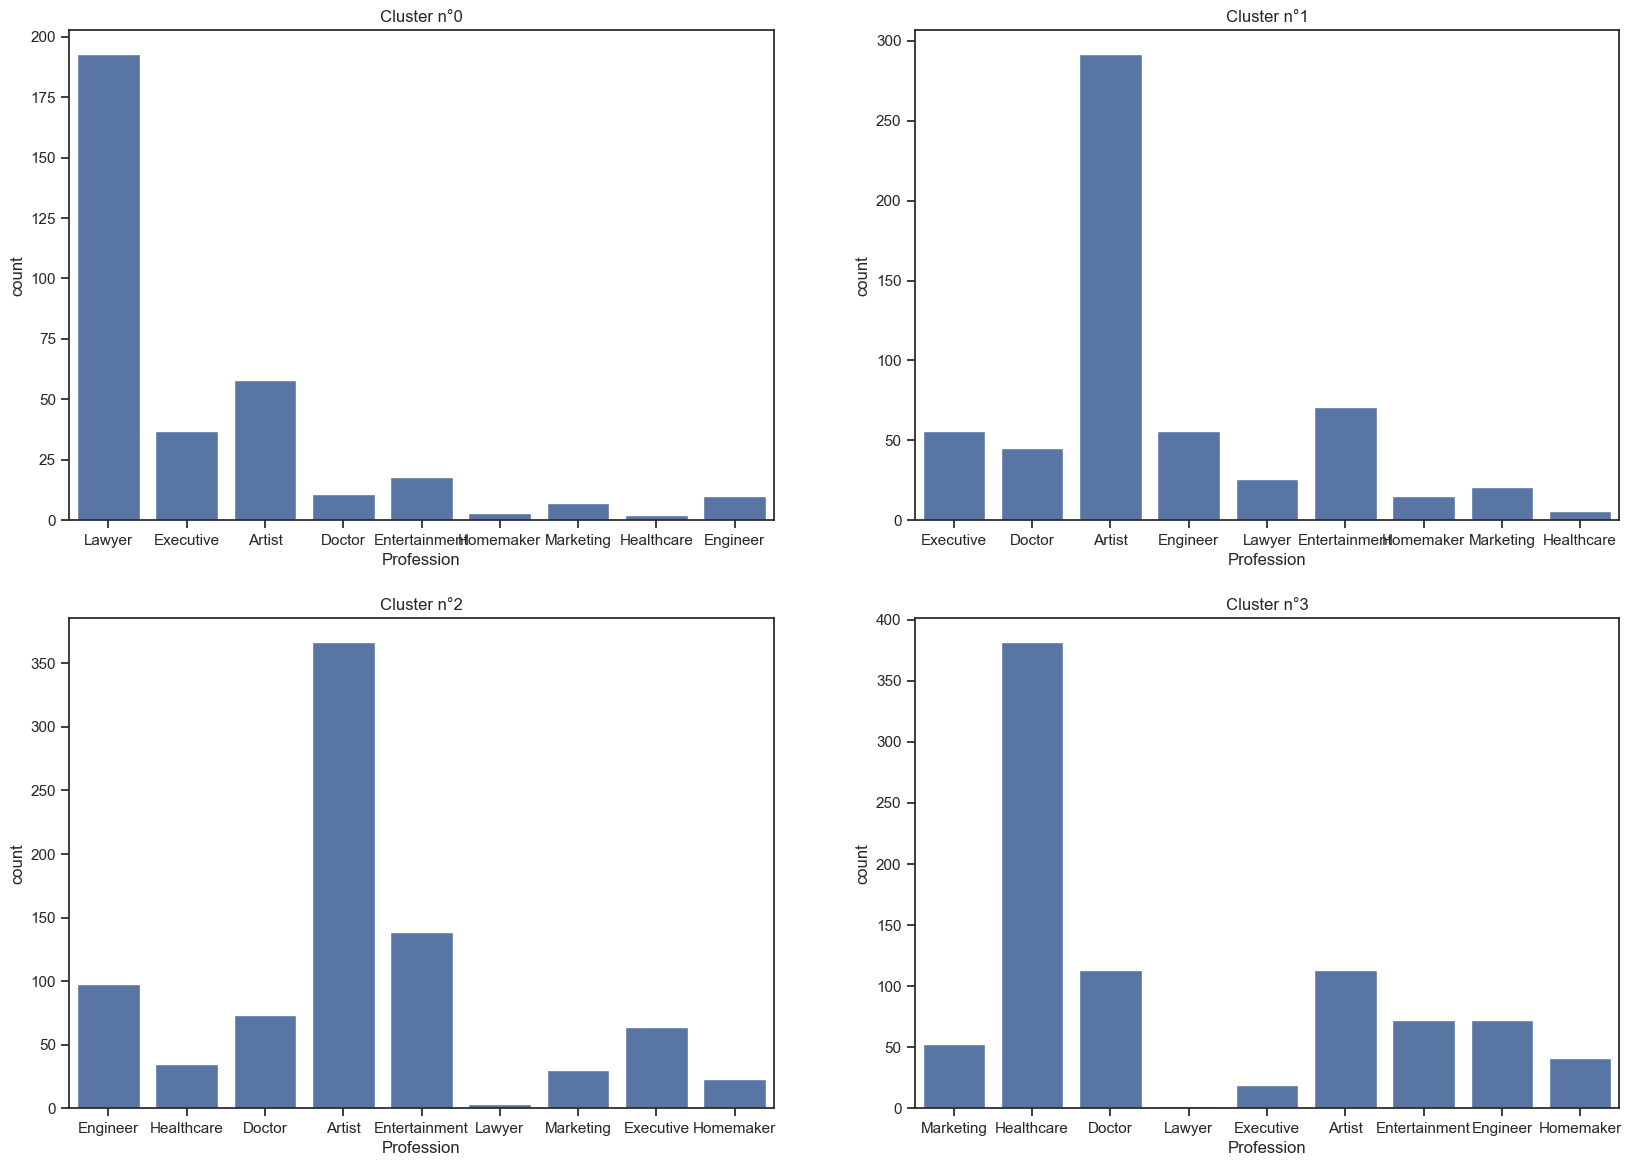

In [138]:
def plot_cluster_professions(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        plt.title(f"Cluster n°{cluster_number}")

        cluster_df = df.query(f"cluster == {cluster_number}")

        sns.countplot(data=cluster_df, x="Profession")

plot_cluster_professions(df, [0, 1, 2, 3])
plt.show()


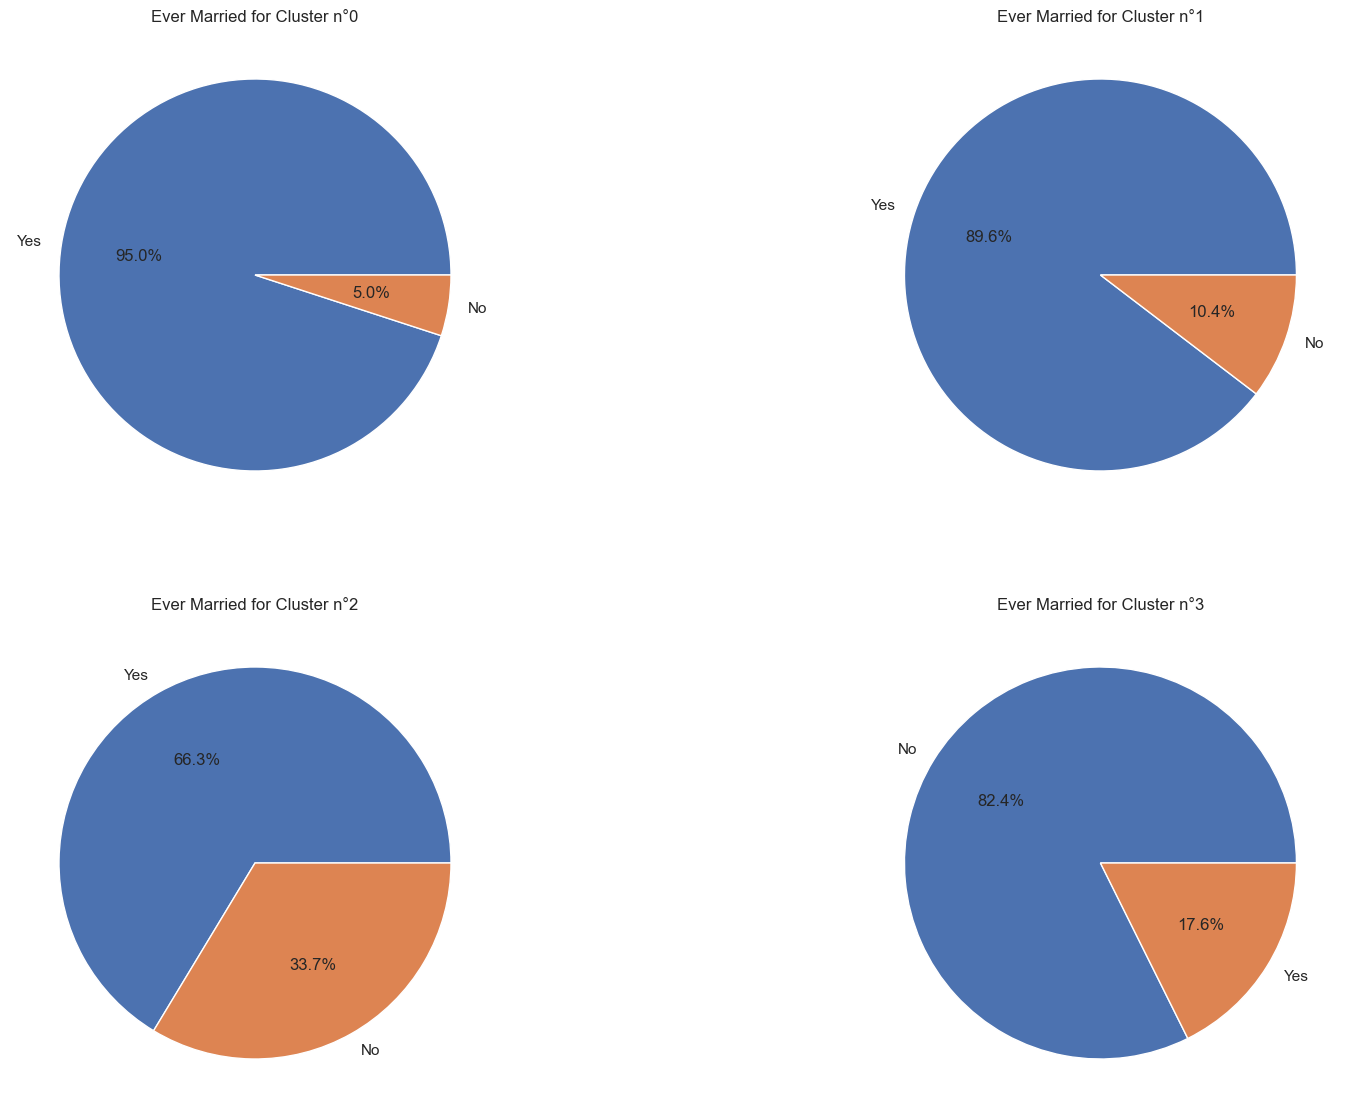

In [139]:
def plot_ever_married_pie_charts(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        cluster_df = df.query(f"cluster == {cluster_number}")

        ever_married_counts = cluster_df['Ever_Married'].value_counts()

        plt.pie(ever_married_counts, labels=ever_married_counts.index, autopct='%1.1f%%')

        plt.title(f'Ever Married for Cluster n°{cluster_number}')

    plt.show()

plot_ever_married_pie_charts(df, [0, 1, 2, 3])


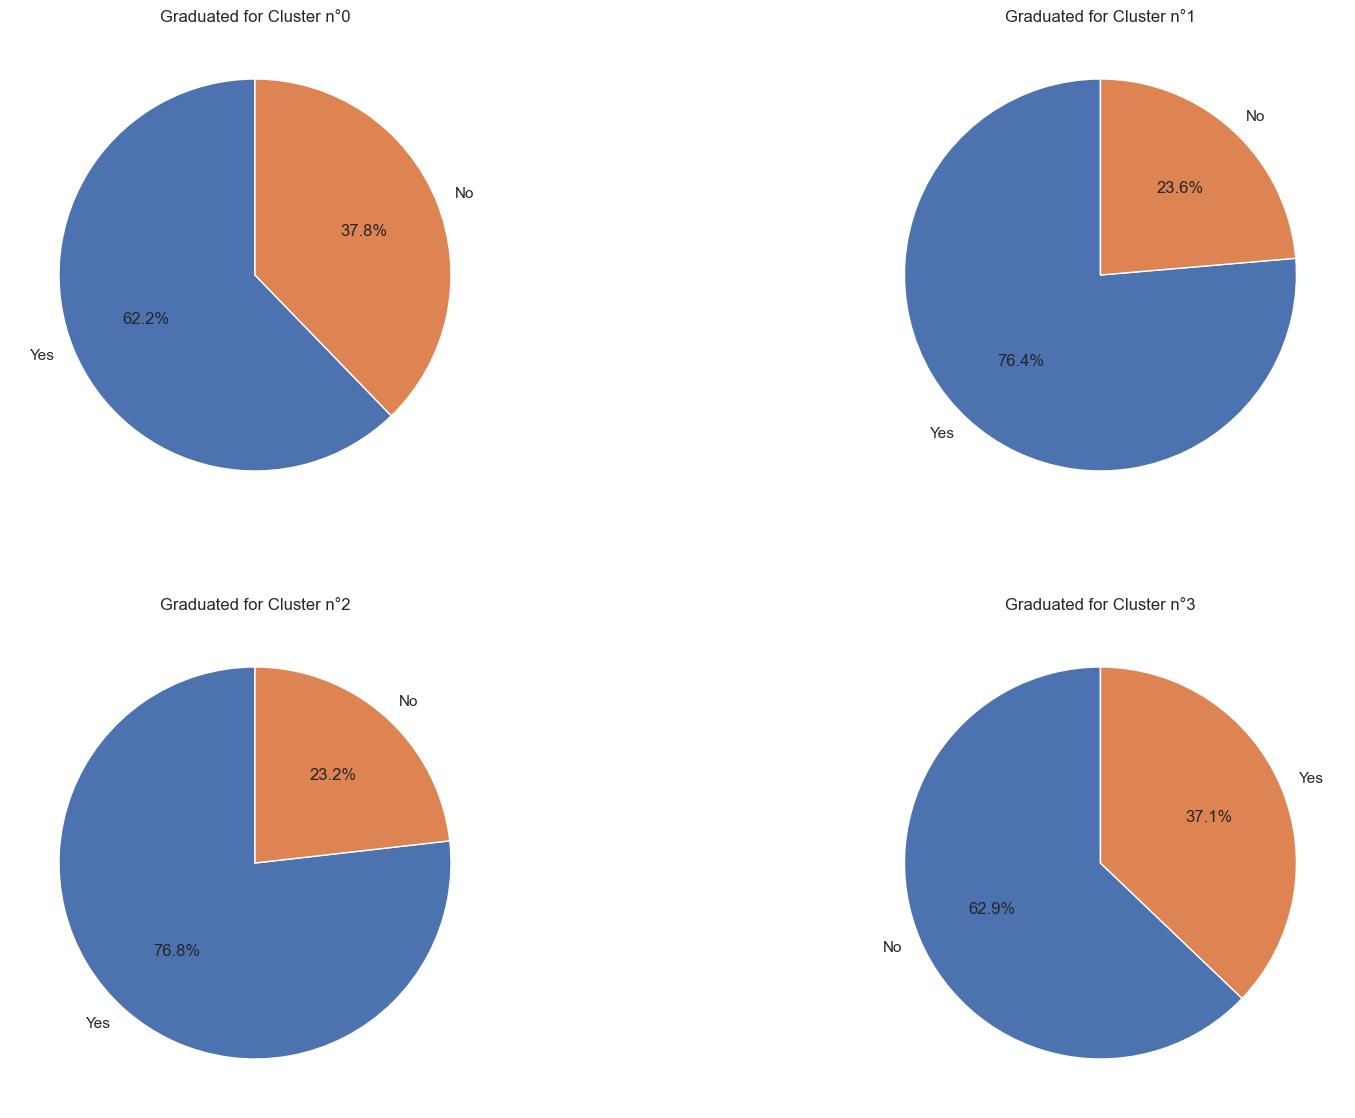

In [140]:
def plot_cluster_graduated_pie_chart(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        cluster_df = df.query(f"cluster == {cluster_number}")

        graduated_counts = cluster_df['Graduated'].value_counts()

        plt.pie(graduated_counts, labels=graduated_counts.index, autopct='%1.1f%%', startangle=90)

        plt.title(f'Graduated for Cluster n°{cluster_number}')

    plt.show()

plot_cluster_graduated_pie_chart(df, [0, 1, 2, 3])


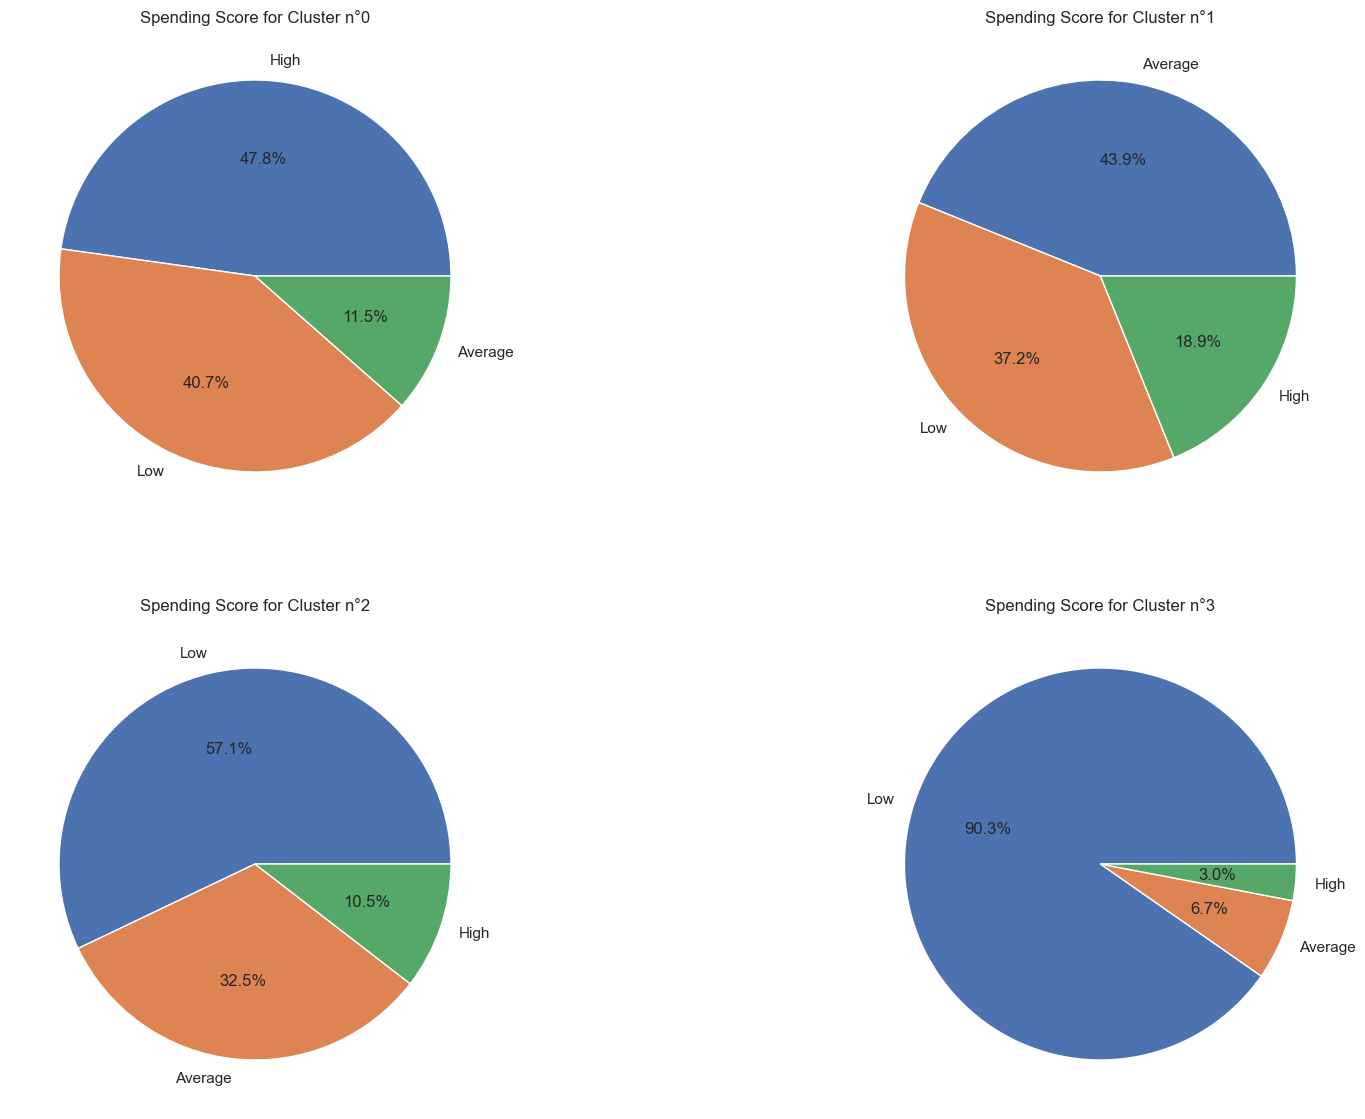

In [141]:
def plot_cluster_spending_score(df, cluster_numbers, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        cluster_df = df.query(f"cluster == {cluster_number}")

        data = cluster_df['Spending_Score'].value_counts()

        plt.pie(data, labels=data.index, autopct='%1.1f%%')

        plt.title(f'Spending Score for Cluster n°{cluster_number}')

    plt.show()

plot_cluster_spending_score(df, [0, 1, 2, 3])


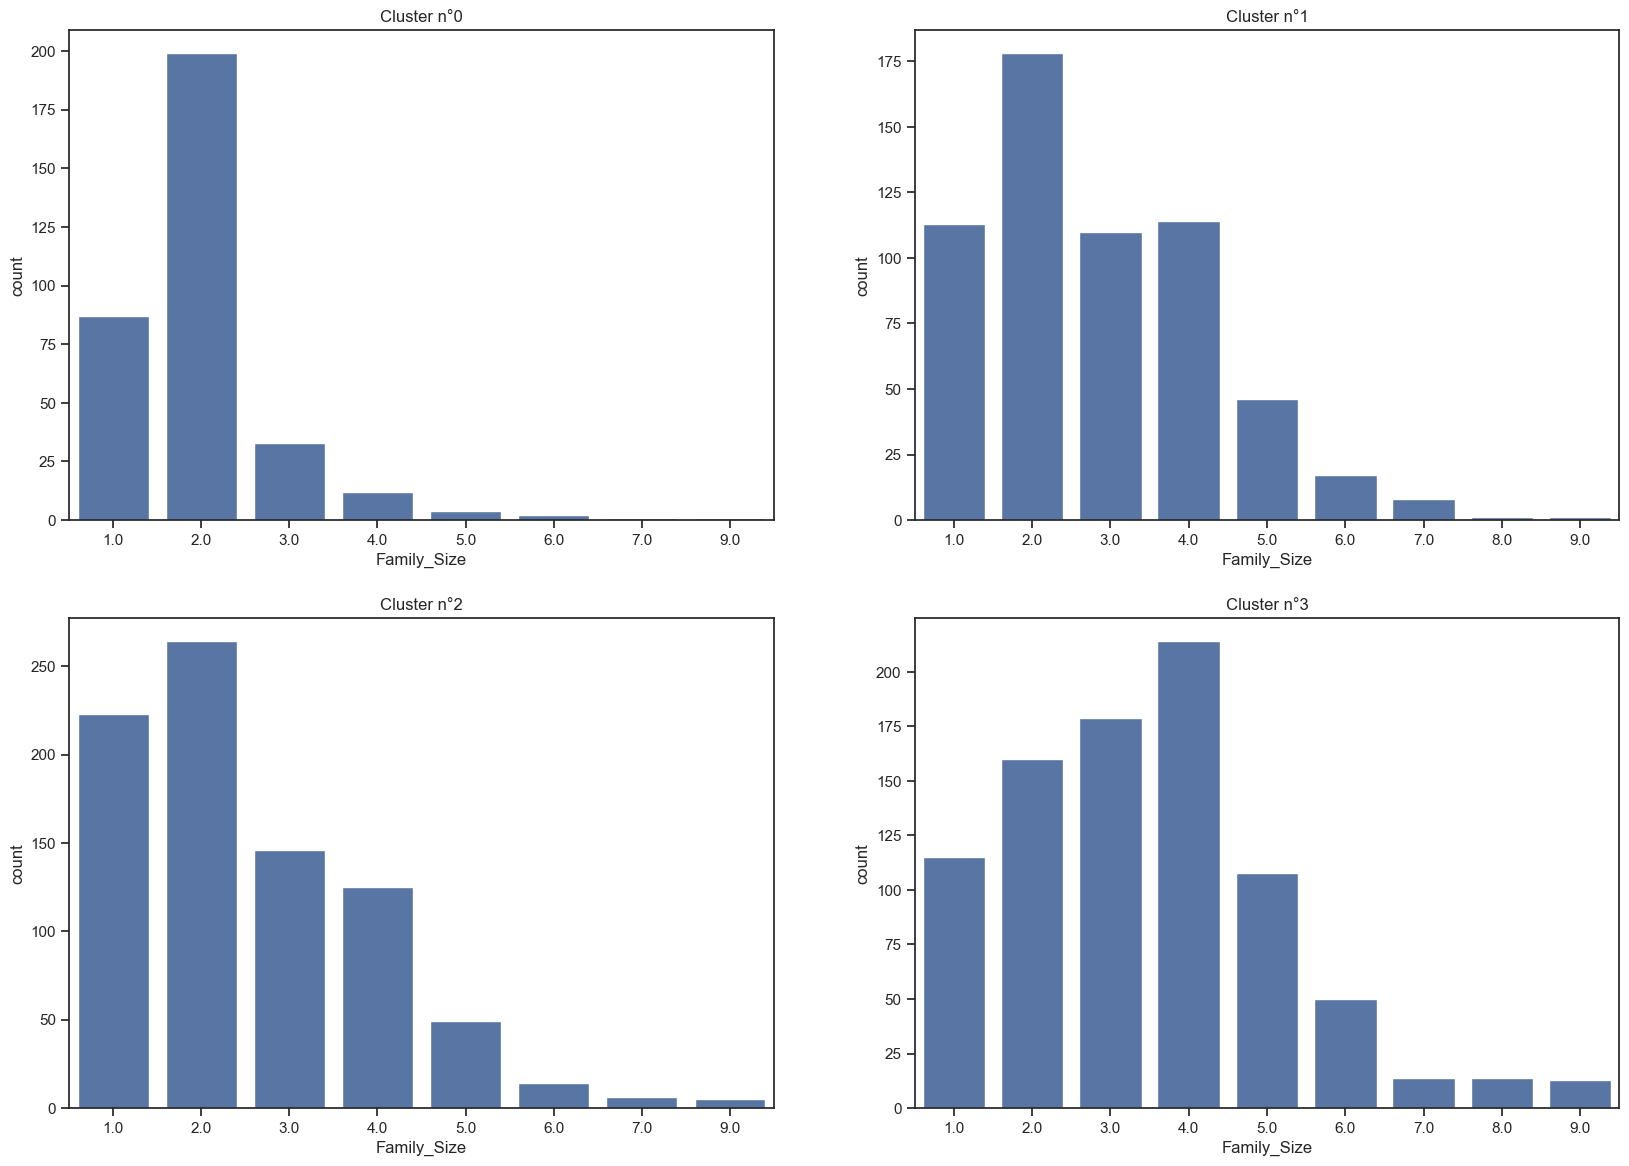

In [142]:
def plot_cluster_feature(df, cluster_numbers, feature, rows=2, cols=2):
    plt.figure(figsize=(cols * 10, rows * 7))

    for i, cluster_number in enumerate(cluster_numbers):
        plt.subplot(rows, cols, i + 1)

        plt.title(f"Cluster n°{cluster_number}")

        cluster_df = df.query(f"cluster == {cluster_number}")

        sns.countplot(data=cluster_df, x=feature)

plot_cluster_feature(df, [0, 1, 2, 3], 'Family_Size')
plt.show()


In [143]:
def calculate_cluster_means(df, grouping_column, numeric_column):
    return df[[grouping_column, numeric_column]].groupby(by=[grouping_column]).mean()

cluster_age_means = calculate_cluster_means(df, 'cluster', 'Age')
print(cluster_age_means)


               Age
cluster           
0        75.961652
1        54.812925
2        40.580529
3        26.395617


Summary of Cluster Characteristics:

Cluster 0: *2
- Dominant Professions: Mainly in Healthcare, followed by Doctors and Artists.
- Marital Status: Mostly Single (82%) and a minority Married (18%).
- Graduation Status: Mostly Non-graduates (63%) with some Graduates (37%).
- Spending Score Distribution: Low (88%), Average (8%), High (4%).
- Family Size: Primarily 4, 3, or 2.
- Average Age: 26.
- Description: Cluster 1 represents customers in healthcare and artistic fields, primarily young and budget-conscious. They are likely to be family-oriented.

Cluster 1: *3
- Dominant Professions: Mostly in the fields of Arts, Entertainment, and Engineering.
- Marital Status: Mostly Married (66%) and some Singles (34%).
- Graduation Status: Majority Graduated (76%) and some Non-graduates (24%).
- Spending Score Distribution: Low (55%), Average (34%), High (11%).
- Family Size: Predominantly 2, with occasional instances of 1 or 3.
- Average Age: 40.
- Description: Cluster 0 represents customers in artistic, entertainment, and engineering fields with a balanced approach to spending. They are likely to be budget-conscious shoppers, willing to spend on average-priced items, and are in the prime of their careers, possibly maintaining a balance between work and personal life.


Cluster 2: *0
- Dominant Professions: Mainly in the Legal field, followed by Artists and Executives.
- Marital Status: Mostly Married (95%) with a small percentage Single (5%).
- Graduation Status: Majority Graduates (63%) and some Non-graduates (37%).
- Spending Score Distribution: Low (41%), Average (13%), High (46%).
- Family Size: Predominantly 2, with occasional instances of 1 or 3.
- Average Age: 75.
- Description: Cluster 2 represents customers in legal and artistic fields, mostly married and graduated, with a varied age range. They are likely to be budget-conscious shoppers, more likely to be single, and include a significant number of customers with a high spending score.

Cluster 3: *1
- Dominant Professions: Mainly in Arts, Entertainment, and Executives.
- Marital Status: Mostly Married (88%) with a minority Single (12%).
- Graduation Status: Majority Graduates (80%) and some Non-graduates (20%).
- Spending Score Distribution: Low (38%), Average (44%), High (18%).
- Family Size: Primarily 2, with occasional instances of 3 or 4.
- Average Age: 54.
- Description: Cluster 3 represents customers in artistic and executive fields, mostly married and graduated, with an average age of 54. This cluster has a higher number of customers with an average spending score.

Conclusion:
This analysis provides insights into the characteristics of each cluster. Feedback, opinions, and suggestions for improvement are welcomed.

## Conclusion
### After completion of training and testing with their dataset, there is not much differnece in output.
### And also there is small overlaps in cluster 0 and cluster 1, which means 2 and 3 in segmentation column.
### By providing more information means more columns, more samples we can classify more accurately.

In [144]:
num_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,1,1.0,1,4.0,D
1,0,1,38,1,2,1.0,2,3.0,A
2,0,1,67,1,2,1.0,1,1.0,B
3,1,1,67,1,3,0.0,3,2.0,B
4,0,1,40,1,4,0.0,3,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,1,0.0,1,7.0,D
8064,1,0,35,0,6,3.0,1,4.0,D
8065,0,0,33,1,1,1.0,1,1.0,D
8066,0,0,27,1,1,1.0,1,4.0,B


In [145]:
num_s_df=num_df.dropna(subset=["Segmentation"],inplace=True)
num_s_df

In [146]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,ID
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,2,458989
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,2,458994
2,Female,Yes,69,No,Lawyer,0.0,Low,1.0,0,458996
3,Male,Yes,59,No,Executive,11.0,High,2.0,1,459000
4,Female,No,19,No,Marketing,11.0,Low,4.0,3,459001
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,3,467954
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,2,467958
2624,Female,No,53,Yes,Entertainment,1.0,Low,2.0,1,467960
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,2,467961


In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns = ['Age', 'Profession', 'Work_Experience', 'Family_Size','Spending_Score']
for column in columns:
    num_df[[column]] = scaler.fit_transform(num_df[[column]])
    num_testdf[[column]] = scaler.fit_transform(num_testdf[[column]])

num_df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,-1.285161,0,-1.515265,-0.475714,-0.737821,0.754820,D
1,0,1,-0.328088,1,-1.051519,-0.475714,0.610888,0.100567,A
2,0,1,1.406608,1,-1.051519,-0.475714,-0.737821,-1.207939,B
3,1,1,1.406608,1,-0.587773,-0.770596,1.959598,-0.553686,B
4,0,1,-0.208454,1,-0.124026,-0.770596,1.959598,2.063325,A


In [148]:
df1=data1.drop(['Var_1','ID'],axis=1)

In [149]:
data1.shape

(8068, 11)

In [150]:
num_testdf

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,-0.450973,1,-1.653664,-0.770279,-0.721968,-1.167096
1,1,1,-0.392035,1,-1.251244,1.609430,0.635146,0.742830
2,0,1,1.494005,0,-0.848823,-0.770279,-0.721968,-1.167096
3,1,1,0.904617,0,-0.446402,2.501821,1.992259,-0.530454
4,0,0,-1.452932,0,-0.043981,2.501821,-0.721968,0.742830
...,...,...,...,...,...,...,...,...
2622,1,0,-0.863544,0,-1.251244,1.906894,-0.721968,0.742830
2623,0,0,-0.509912,1,0.358440,-0.472815,-0.721968,-1.167096
2624,0,0,0.550985,1,1.163281,-0.472815,-0.721968,-0.530454
2625,1,1,0.197353,1,-0.446402,-0.472815,1.992259,1.379472


In [151]:
train_X = num_df.loc[:, 'Gender':'Family_Size']
train_y = num_df.loc[:, 'Segmentation']
test_x=num_testdf.loc[:,'Gender':'Family_Size']
print(train_X.shape,train_y.shape)

(8054, 8) (8054,)


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.2, random_state=12)
y_val.shape

(1611,)

# SVM Classifier

In [156]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',gamma=0.5, C=1)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)
y_pred.shape

(1611,)

In [157]:
y_pred1 = clf.predict(test_x)
print(y_pred1.shape)
y_pred1

(2626,)


array(['D', 'D', 'A', ..., 'B', 'B', 'D'], dtype=object)

In [158]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.5009310986964618


# KNN Classifier Algorithm

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, leaf_size = 4, p =10)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=11, p=10)

In [160]:
y_pred_knn = knn.predict(X_val)
y_tes_knn = knn.predict(test_x)

y_pred_knn

array(['C', 'D', 'A', ..., 'D', 'C', 'C'], dtype=object)

In [161]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


from sklearn.metrics import accuracy_score
knn_Accuracy = accuracy_score(y_val, y_pred_knn)
print("Accuracy for KNN:", knn_Accuracy)
knn_Precision = precision_score(y_val, y_pred_knn,average='macro')
print("Precision for KNN:", knn_Precision)
knn_Recall = recall_score(y_val, y_pred_knn,average='macro')
print("Recall for KNN:", knn_Recall)
knn_F1score = f1_score(y_val, y_pred_knn,average='macro')
print("F1Score for KNN:", knn_F1score)


Accuracy for KNN: 0.4761018001241465
Precision for KNN: 0.4706394884092726
Recall for KNN: 0.47443194478772
F1Score for KNN: 0.46877846371926624


# Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

ran_for = RandomForestClassifier()
ran_for.fit(X_train, y_train)

RandomForestClassifier()

In [163]:
y_pred_RF = ran_for.predict(X_val)
y_test_RF = ran_for.predict(test_x)

y_pred_RF

array(['D', 'D', 'D', ..., 'D', 'B', 'A'], dtype=object)

In [164]:

RF_Accuracy = accuracy_score(y_val, y_pred_RF)
print("Accuracy for RF:", RF_Accuracy)
RF_Precision = precision_score(y_val, y_pred_RF,average='macro')
print("Precision for RF:", RF_Precision)
RF_Recall = recall_score(y_val, y_pred_RF,average='macro')
print("Recall for RF:", RF_Recall)
RF_F1score = f1_score(y_val, y_pred_RF,average='macro')
print("F1Score for RF:", RF_F1score)

Accuracy for RF: 0.47051520794537555
Precision for RF: 0.4623562096889353
Recall for RF: 0.46786311499500266
F1Score for RF: 0.46445413992411133


# Logistic regression algorithm model training

In [165]:
from sklearn.linear_model import LogisticRegression

lgt = LogisticRegression()
lgt.fit(X_train, y_train)

LogisticRegression()

In [166]:
y_pred_lgt = lgt.predict(X_val)
y_test_lgt = lgt.predict(test_x)

y_pred_lgt

array(['C', 'D', 'C', ..., 'D', 'C', 'C'], dtype=object)

In [167]:

log_Accuracy = accuracy_score(y_val, y_pred_lgt)
print("Accuracy for log:", RF_Accuracy)
log_Precision = precision_score(y_val, y_pred_lgt,average='macro')
print("Precision for log:", RF_Precision)
log_Recall = recall_score(y_val, y_pred_lgt,average='macro')
print("Recall for log:", RF_Recall)
log_F1score = f1_score(y_val, y_pred_lgt,average='macro')
print("F1Score for log:", RF_F1score)

Accuracy for log: 0.47051520794537555
Precision for log: 0.4623562096889353
Recall for log: 0.46786311499500266
F1Score for log: 0.46445413992411133


# MLP Classifier with 2 hidden layers

In [168]:
num_df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,-1.285161,0,-1.515265,-0.475714,-0.737821,0.754820,D
1,0,1,-0.328088,1,-1.051519,-0.475714,0.610888,0.100567,A
2,0,1,1.406608,1,-1.051519,-0.475714,-0.737821,-1.207939,B
3,1,1,1.406608,1,-0.587773,-0.770596,1.959598,-0.553686,B
4,0,1,-0.208454,1,-0.124026,-0.770596,1.959598,2.063325,A
...,...,...,...,...,...,...,...,...,...
8063,1,0,-1.285161,0,-1.515265,-0.770596,-0.737821,2.717578,D
8064,1,0,-0.507539,0,0.803466,0.114050,-0.737821,0.754820,D
8065,0,0,-0.627173,1,-1.515265,-0.475714,-0.737821,-1.207939,D
8066,0,0,-0.986076,1,-1.515265,-0.475714,-0.737821,0.754820,B


In [169]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [170]:
x = num_df.drop('Segmentation', axis=1)
y = num_df['Segmentation']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [171]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),
                        max_iter = 300,activation = 'tanh',
                        solver = 'adam')

In [172]:
mlp_clf.fit(trainX, trainY)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 2), max_iter=300)

In [173]:
y_pred = mlp_clf.predict(testX)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.49


In [174]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           A       0.38      0.54      0.45       377
           B       0.38      0.13      0.19       407
           C       0.49      0.59      0.54       376
           D       0.63      0.68      0.66       451

    accuracy                           0.49      1611
   macro avg       0.47      0.49      0.46      1611
weighted avg       0.48      0.49      0.46      1611



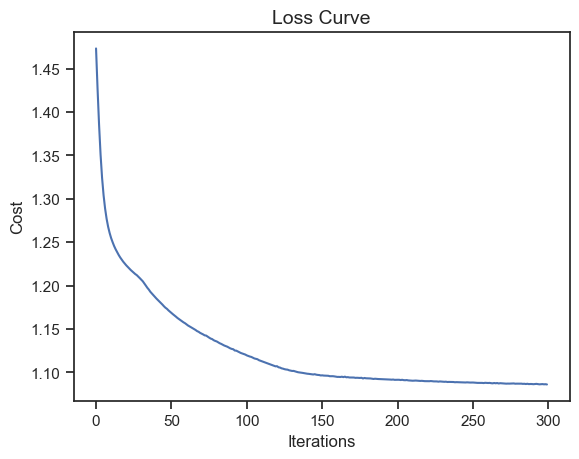

In [175]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [176]:
from sklearn import metrics

In [177]:
confusion_matrix = metrics.confusion_matrix(testY,y_pred)
confusion_matrix

array([[204,  34,  62,  77],
       [150,  53, 148,  56],
       [ 72,  37, 221,  46],
       [113,  14,  16, 308]])

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

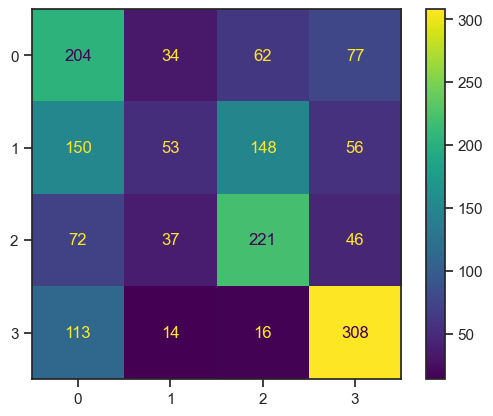

In [178]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [179]:
Accuracy = accuracy_score(testY,y_pred)
print(Accuracy)
Precision = precision_score(testY,y_pred,average='macro')
print(Precision)

Recall = recall_score(testY,y_pred,average='macro')
print(Recall)

F1score = f1_score(testY,y_pred,average='macro')
print(F1score)


0.48789571694599626
0.4723468314679118
0.4855069938229173
0.45842155404766544


# Conclusion

From above all algorithms, What we got:

Accuracy for KNN: 0.474

Accuracy for Random Forest: 0.46

Accuracy for Logistic: 0.464

silhouette_score for K-prototype: 0.40

Accuracy for SVM classifier: 0.50

Accuracy for Multi Layer Perceptron classifier MLP ( 2 Hidden layers): 0.50

From the above scores and training of each model, we conclude that K-prototype algorithm got good classification compared to all.

In K-prototype also we got 80%  correctly classified with the Test.csv file. and we got some mismatches in the cluster 2 and 3. but it is good enough to classify.

In SVM classifier, The classification is good enough to classify compared to k-prototype algorythm

also we can improve the accuracy score by increasing the samples or variables in the dataset.